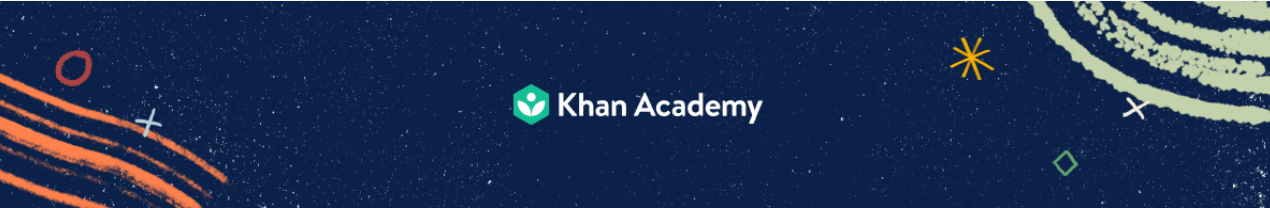

# **Take Home Assignment: Month 3 Retention**

## **Introduction about the Assignment:**

We are providing here a sample [dataset](https://drive.google.com/drive/u/1/folders/16llxUGWoJe2F9xEDOJji7vTS00sjbShR) that captures the usage behavior of a user cohort within their 1st month of starting to use the website. We’ve also included indicators on whether the users have continued to use the website 3 months after their initial use. For detailed description of what the dataset contains, you may refer to the [data dictionary](https://docs.google.com/spreadsheets/d/1t1w2LvO5pqceVa7v5e34F730hZ809t3B/edit#gid=1215246912).


We are interested in learning about the behavioral patterns of our users in their first month of usage, particularly for any leading indicators of longer term engagement with the website.


#### **Some questions we would like to answer include:**

1. What are the general usage patterns and behaviors for these users in their 1st month?

2. Are there any behaviors & usage patterns in the 1st month that correlate with month 3 retention? (i.e. choice of learning topic and long term engagement)

3. What recommendations would you make around how we should think about improving month 3 retention? If you had access to more information, what other data points might you want to have to answer this question?


---

---


### First questions/hypotesis about what could be explored and obtained from the dataset:

- How many users are there in the dataset?
- What is the proportion of users with 3 month retention vs users not retained?
- What is the proportion of registered vs unregistered users?
- What is the average use for each "group", like average minutes, average accesses, etc?

**Ideia: try to develop a ML model to predict the likelihood of a new user to continue to use 3 months later, based on the behaviors on the first month.**

### References used to develop this notebook:

- https://towardsdatascience.com/4-libraries-that-can-perform-eda-in-one-line-of-python-code-b13938a06ae
- https://www.statology.org/pandas-pivot-table-replace-nan-with-0/
- https://towardsdatascience.com/100-stacked-charts-in-python-6ca3e1962d2b
- https://htmlcolors.com/brand-color/khan-academy
- https://stackoverflow.com/questions/32244019/how-to-rotate-x-axis-tick-labels-in-a-pandas-plot
- https://en.wikipedia.org/wiki/Administrative_divisions_of_India

## **Installation and import of necessary libraries:**

### Installation of libraries not already installed by default on Google Colab environment:

In [ ]:
#!pip install ??
##################################################
# no new library was necessary for this assignment
##################################################

### All necessary libraries are on the cell below for best organization of the code:

In [ ]:
# libraries for basic data manipulation:
import numpy as np
import pandas as pd

# libraries to create plots and visualizations:
import seaborn as sns
import matplotlib.pyplot as plt

## **Beginning of the code:**

### All necessary functions created for this notebook are declared on the cell below:

In [ ]:
def load_dataset(drive_url):

    file_id = drive_url.split('/')[-2]
    csv_url = f'https://drive.google.com/uc?id={file_id}'

    df = pd.read_csv(csv_url)

    return df


###############################################################
# no other functions were created for this assignment,
# but if I had more time, I would create some more functions
# to reuse some of the code I used on the cells below.
###############################################################


### 1 - Get datasets to use on the rest of the code:

In [ ]:
# links for the datasets provided:
df_users = load_dataset('https://drive.google.com/file/d/1G331cl4MCADN-jYBrFnIhkb9xNVRW_Yv/view?usp=share_link')
df_usage = load_dataset('https://drive.google.com/file/d/1WeLDM-OP-XhE5ob6TwTAtD4Tt3zhisJq/view?usp=share_link')
df_outcome = load_dataset('https://drive.google.com/file/d/1do7kOvkeTL0IkXa3gbW33HT430NUx1-z/view?usp=share_link')

print(f'df_users.shape: {df_users.shape}')
print(f'df_usage.shape: {df_usage.shape}')
print(f'df_outcome.shape: {df_outcome.shape}')

df_users.shape: (7612, 10)
df_usage.shape: (16394, 15)
df_outcome.shape: (7612, 2)


There are 7,612 users on the dataset.

In [ ]:
# checking the data on each dataframe:
df_users.head()

,user_id,first_use_month,first_use_ts,is_registered_user,user_primary_type,country_cd,region,city,attributed_channel,referer_url
0,kaid_1172977777831184091024959,2021-01-01 00:00:00,2021-01-18 03:10:00,False,Unregistered Learner,IN,GA,Navelim,organic search,https://www.google.com/
1,kaid_1167642368311104946092969,2021-01-01 00:00:00,2021-01-04 06:13:35,False,Unregistered Learner,IN,GA,Alto-Porvorim,intra_ka,https://www.khanacademy.org/math/in-in-class-1...
2,kaid_167569696178549414384138,2021-01-01 00:00:00,2021-01-24 17:22:43,False,Unregistered Learner,IN,MZ,Aizawl,other KA marketing,NaN
3,kaid_1030430879261145466031150,2021-01-01 00:00:00,2021-01-15 05:42:56,False,Unregistered Learner,IN,NL,Kohima,organic search,https://www.google.com/
4,kaid_826231243401218994536338,2021-01-01 00:00:00,2021-01-21 10:28:37,False,Unregistered Learner,IN,CH,Chandigarh,other KA marketing,NaN


In [ ]:
df_usage.head()

,user_id,usage_date,total_mins,activity,content_type,domain_title,course_title,unit_title,locale,client,device_type,os,is_detected_weekday_7am_3pm,start_time_first_ts,end_time_last_ts
0,kaid_543136637624086966998595,2021-01-06 00:00:00,0.009533,WATCHING,VIDEO,NaN,NaN,NaN,en,web,Desktop Web (Non-Chromebook),Linux / Ubuntu / Other Distributions,False,2021-01-06 09:41:53,2021-01-06 10:13:19
1,kaid_543136637624086966998595,2021-01-06 00:00:00,14.042767,WATCHING,VIDEO,Math,Statistics and probability,Confidence intervals,en,web,Desktop Web (Non-Chromebook),Linux / Ubuntu / Other Distributions,False,2021-01-06 09:41:52,2021-01-06 10:19:17
2,kaid_543136637624086966998595,2021-01-06 00:00:00,3.010483,WATCHING,VIDEO,Math,AP®︎ Statistics,Probability,en,web,Desktop Web (Non-Chromebook),Linux / Ubuntu / Other Distributions,False,2021-01-06 10:00:03,2021-01-06 10:03:05
3,kaid_543136637624086966998595,2021-01-06 00:00:00,0.042133,PRACTICING,EXERCISE,Math,AP®︎ Statistics,Probability,en,web,Desktop Web (Non-Chromebook),Linux / Ubuntu / Other Distributions,False,2021-01-06 10:03:12,2021-01-06 10:03:15
4,kaid_1145703200171210503419649,2021-01-11 00:00:00,4.731283,WATCHING,VIDEO,Science,Physics,"Magnetic forces, magnetic fields, and Faraday'...",en,web,Desktop Web (Non-Chromebook),Mac OS X,False,2021-01-11 20:28:13,2021-01-11 20:32:57


In [ ]:
df_outcome.head()

,user_id,m3_retained
0,kaid_1061303340925871095830606,0
1,kaid_1057179999781987835968845,0
2,kaid_1057007930883161077415453,0
3,kaid_1055806603896825777487286,0
4,kaid_1063978248148350254835139,0


In [ ]:
# checking the proportion of registered vs non registered users:
print('Absolute values:')
print(df_users['is_registered_user'].value_counts(dropna=False, normalize=False))

print('')
print('Relative values:')
print(df_users['is_registered_user'].value_counts(dropna=False, normalize=True))

Absolute values:
False    6828
True      784
Name: is_registered_user, dtype: int64

Relative values:
False    0.897005
True     0.102995
Name: is_registered_user, dtype: float64


Almost 90% of the users do not own an account on Khan Academy.

In [ ]:
# checking the proportion of retained vs non retained users:
print('Absolute values:')
print(df_outcome['m3_retained'].value_counts(dropna=False, normalize=False))

print('')
print('Relative values:')
print(df_outcome['m3_retained'].value_counts(dropna=False, normalize=True))

Absolute values:
0    6830
1     782
Name: m3_retained, dtype: int64

Relative values:
0    0.897267
1    0.102733
Name: m3_retained, dtype: float64


Almost 90% of the users have not continued to use the website 3 months after their initial use.

### 2 - Prepare the dataset:

- Adjust data types, if necessary;
- Remove unnecessary columns;
- Check for missing values;
- Check for duplicate data;
- Join user and outcome datasets into one single dataframe.

##### User dataset:

In [ ]:
# checking if there are duplicate rows:
df_users['user_id'].nunique()

7612

Just one row per user_id, so OK, no duplicates!

In [ ]:
# checking cardinality of the categorical columns:
df_users['first_use_month'].value_counts(dropna=False)

2021-01-01 00:00:00    7612
Name: first_use_month, dtype: int64

All users started using website on the same month, January of 2021, so the column 'first_use_month' can be removed.

In [ ]:
# removing column 'first_use_month':
df_users.drop('first_use_month', axis=1, inplace=True)

In [ ]:
# checking cardinality of the categorical columns:
df_users['country_cd'].value_counts(dropna=False)

IN    7612
Name: country_cd, dtype: int64

All users are from the same country (India), so the column 'country_cd' can be removed.

In [ ]:
# removing column 'country_cd':
df_users.drop('country_cd', axis=1, inplace=True)

In [ ]:
# checking the other columns:
for col in df_users.columns:
    print(f'Column: {col}')
    print(df_users[col].value_counts(dropna=False, normalize=True).head())
    print('')

Column: user_id
kaid_1172977777831184091024959    0.000131
kaid_755944420726713949839812     0.000131
kaid_281816905255758028713194     0.000131
kaid_950356440030246116304228     0.000131
kaid_183386567272158705763571     0.000131
Name: user_id, dtype: float64

Column: first_use_ts
2021-01-29 04:29:51    0.000263
2021-01-17 14:17:54    0.000263
2021-01-18 15:15:29    0.000263
2021-01-09 07:07:53    0.000263
2021-01-28 11:22:33    0.000263
Name: first_use_ts, dtype: float64

Column: is_registered_user
False    0.897005
True     0.102995
Name: is_registered_user, dtype: float64

Column: user_primary_type
Unregistered Learner    0.897005
Registered Learner      0.094982
Teacher                 0.005123
Parent                  0.002890
Name: user_primary_type, dtype: float64

Column: region
MH    0.123358
UP    0.113505
KA    0.078692
TN    0.065949
DL    0.065686
Name: region, dtype: float64

Column: city
Delhi        0.059774
Bangalore    0.049527
Mumbai       0.028639
Hyderabad    0.026

All the other columns have cardinality bigger than 1, so they all will be maintained in the dataset.

In [ ]:
# checking data types:
df_users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7612 entries, 0 to 7611
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   user_id             7612 non-null   object
 1   first_use_ts        7612 non-null   object
 2   is_registered_user  7612 non-null   bool  
 3   user_primary_type   7612 non-null   object
 4   region              7611 non-null   object
 5   city                7611 non-null   object
 6   attributed_channel  7612 non-null   object
 7   referer_url         5019 non-null   object
dtypes: bool(1), object(7)
memory usage: 423.8+ KB


In [ ]:
# converting 'first_use_ts' to datetime:
df_users['first_use_ts'] = pd.to_datetime(df_users['first_use_ts'])

In [ ]:
df_users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7612 entries, 0 to 7611
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   user_id             7612 non-null   object        
 1   first_use_ts        7612 non-null   datetime64[ns]
 2   is_registered_user  7612 non-null   bool          
 3   user_primary_type   7612 non-null   object        
 4   region              7611 non-null   object        
 5   city                7611 non-null   object        
 6   attributed_channel  7612 non-null   object        
 7   referer_url         5019 non-null   object        
dtypes: bool(1), datetime64[ns](1), object(6)
memory usage: 423.8+ KB


All columns from df_users dataframe now seem to be with the adequate data type, so continuing...

In [ ]:
# checking missing values:
df_users.isnull().sum()

user_id                  0
first_use_ts             0
is_registered_user       0
user_primary_type        0
region                   1
city                     1
attributed_channel       0
referer_url           2593
dtype: int64

In [ ]:
# checking missing values:
df_users[df_users['region'].isna()]

,user_id,first_use_ts,is_registered_user,user_primary_type,region,city,attributed_channel,referer_url
103,kaid_704617319321285532487084,2021-01-14 19:43:15,True,Parent,NaN,NaN,intra_ka,https://www.khanacademy.org/signup?isparent=1&...


In [ ]:
# checking missing values:
df_users[df_users['city'].isna()]

,user_id,first_use_ts,is_registered_user,user_primary_type,region,city,attributed_channel,referer_url
103,kaid_704617319321285532487084,2021-01-14 19:43:15,True,Parent,NaN,NaN,intra_ka,https://www.khanacademy.org/signup?isparent=1&...


Only one user with both the columns 'region' and 'city' with missing values (NaN), so OK.

In [ ]:
# checking missing values:
df_users[df_users['referer_url'].isna()]

,user_id,first_use_ts,is_registered_user,user_primary_type,region,city,attributed_channel,referer_url
2,kaid_167569696178549414384138,2021-01-24 17:22:43,False,Unregistered Learner,MZ,Aizawl,other KA marketing,NaN
4,kaid_826231243401218994536338,2021-01-21 10:28:37,False,Unregistered Learner,CH,Chandigarh,other KA marketing,NaN
7,kaid_820260079630361901214841,2021-01-09 02:49:34,False,Unregistered Learner,CH,Chandigarh,other KA marketing,NaN
11,kaid_300908511105530003172713,2021-01-23 12:32:22,False,Unregistered Learner,CH,Manimajra,direct,NaN
12,kaid_307903425126758658740753,2021-01-13 03:43:48,True,Registered Learner,MN,Imphal,direct,NaN
...,...,...,...,...,...,...,...,...
7582,kaid_511892205337707982291926,2021-01-05 06:33:18,False,Unregistered Learner,WB,Calcutta,direct,NaN
7583,kaid_675840974706663909974732,2021-01-28 17:08:14,False,Unregistered Learner,WB,Tajpur,direct,NaN
7595,kaid_917818195273076084544378,2021-01-24 05:34:44,False,Unregistered Learner,WB,Bangaon,direct,NaN
7609,kaid_271109169914318984936310,2021-01-12 05:05:54,False,Unregistered Learner,WB,Achintanagar,other KA marketing,NaN


2,593 users without the referer_url information. Later, I will see what to do about this, depending on the analysis I need to make.

##### Outcome dataset:

In [ ]:
# checking if there are duplicate rows on the df_outcome dataframe:
df_outcome['user_id'].nunique()

7612

Also, just one row per user_id, so OK! I can join both dataframes into a single one (df_users and df_outcome).

In [ ]:
# checking if there are missing values on the df_outcome dataframe:
df_outcome.isnull().sum()

user_id        0
m3_retained    0
dtype: int64

No missing values, so moving on...

In [ ]:
# joining the datasets with users and outcome information:
df_users_outcome = pd.merge(df_users, df_outcome, on='user_id', how='left', indicator=True)
df_users_outcome.shape

(7612, 10)

In [ ]:
df_users_outcome['_merge'].value_counts(dropna=False)

both          7612
left_only        0
right_only       0
Name: _merge, dtype: int64

All users on the df_users dataframe have a match on the df_outcome dataframe, so that is very good!! I can now remove the '_merge' column.

In [ ]:
# removing '_merge' column:
df_users_outcome.drop('_merge', axis=1, inplace=True)

In [ ]:
# taking a look on the resulting dataframe so far:
df_users_outcome.head()

,user_id,first_use_ts,is_registered_user,user_primary_type,region,city,attributed_channel,referer_url,m3_retained
0,kaid_1172977777831184091024959,2021-01-18 03:10:00,False,Unregistered Learner,GA,Navelim,organic search,https://www.google.com/,0
1,kaid_1167642368311104946092969,2021-01-04 06:13:35,False,Unregistered Learner,GA,Alto-Porvorim,intra_ka,https://www.khanacademy.org/math/in-in-class-1...,0
2,kaid_167569696178549414384138,2021-01-24 17:22:43,False,Unregistered Learner,MZ,Aizawl,other KA marketing,NaN,0
3,kaid_1030430879261145466031150,2021-01-15 05:42:56,False,Unregistered Learner,NL,Kohima,organic search,https://www.google.com/,0
4,kaid_826231243401218994536338,2021-01-21 10:28:37,False,Unregistered Learner,CH,Chandigarh,other KA marketing,NaN,0


##### Usage dataset:

In [ ]:
# checking for duplicate rows:
df_usage.duplicated().sum()

750

It seems that there are 750 duplicated rows on the usage dataset!

In [ ]:
df_usage[df_usage.duplicated()]['user_id'].value_counts(dropna=False)

kaid_937791129916431818892095     31
kaid_449647790740398997688809     17
kaid_855560477503313034818523     13
kaid_1078615978264938917013118    12
kaid_423750345825160830934590     12
                                  ..
kaid_482495350834076461850090      1
kaid_825971844231075546682232      1
kaid_158361417591080028218594      1
kaid_13140270206700972564626       1
kaid_962872400057325993686990      1
Name: user_id, Length: 390, dtype: int64

Let me see this user with 30 duplicated rows...

In [ ]:
df_usage.query("user_id == 'kaid_937791129916431818892095' ").head(6)

,user_id,usage_date,total_mins,activity,content_type,domain_title,course_title,unit_title,locale,client,device_type,os,is_detected_weekday_7am_3pm,start_time_first_ts,end_time_last_ts
8277,kaid_937791129916431818892095,2021-01-28 00:00:00,40.340134,WATCHING,VIDEO,Science,Class 10 Physics (India),Magnetic effects of electric current,en,app,Phone,Android,True,2021-01-28 05:44:40,2021-01-28 07:05:52
8278,kaid_937791129916431818892095,2021-01-28 00:00:00,40.340134,WATCHING,VIDEO,Science,Class 10 Physics (India),Magnetic effects of electric current,en,app,Phone,Android,True,2021-01-28 05:44:40,2021-01-28 07:05:52
8279,kaid_937791129916431818892095,2021-01-28 00:00:00,16.860434,PRACTICING,EXERCISE,Science,Class 10 Physics (India),Magnetic effects of electric current,en,app,Phone,Android,True,2021-01-28 05:44:30,2021-01-28 06:08:50
8280,kaid_937791129916431818892095,2021-01-28 00:00:00,16.860434,PRACTICING,EXERCISE,Science,Class 10 Physics (India),Magnetic effects of electric current,en,app,Phone,Android,True,2021-01-28 05:44:30,2021-01-28 06:08:50
8281,kaid_937791129916431818892095,2021-01-28 00:00:00,14.394783,PRACTICING,TOPIC_UNIT_TEST,Science,Class 10 Physics (India),Magnetic effects of electric current,en,app,Phone,Android,True,2021-01-28 06:09:07,2021-01-28 06:23:55
8282,kaid_937791129916431818892095,2021-01-28 00:00:00,14.394783,PRACTICING,TOPIC_UNIT_TEST,Science,Class 10 Physics (India),Magnetic effects of electric current,en,app,Phone,Android,True,2021-01-28 06:09:07,2021-01-28 06:23:55


It really looks like there are some duplicated rows! I will remove them now!

In [ ]:
# removing duplicated rows:
df_usage.drop_duplicates(keep='first', ignore_index=True, inplace=True)

In [ ]:
# checking if all duplicated were really removed:
df_usage.duplicated().sum()

0

In [ ]:
df_usage.shape

(15644, 15)

Great!! The 750 duplicated rows were successfully removed!! Moving on...

In [ ]:
# checking missing values:
df_usage.isnull().sum()

user_id                           0
usage_date                        0
total_mins                        0
activity                          0
content_type                     20
domain_title                   2323
course_title                   2323
unit_title                     2515
locale                            0
client                            0
device_type                       0
os                                0
is_detected_weekday_7am_3pm       0
start_time_first_ts               0
end_time_last_ts                  0
dtype: int64

In [ ]:
# checking missing values:
df_usage[df_usage['content_type'].isna()].head()

,user_id,usage_date,total_mins,activity,content_type,domain_title,course_title,unit_title,locale,client,device_type,os,is_detected_weekday_7am_3pm,start_time_first_ts,end_time_last_ts
853,kaid_1080596503603045389760214,2021-01-24 00:00:00,1.806217,WATCHING,NaN,NaN,NaN,NaN,en,web,Desktop Web (Non-Chromebook),Windows,False,2021-01-24 14:14:58,2021-01-24 14:16:46
2973,kaid_354110121635274733598514,2021-01-31 00:00:00,1.337700,PROGRAMMING,NaN,NaN,NaN,NaN,en,web,Desktop Web (Non-Chromebook),Linux / Ubuntu / Other Distributions,False,2021-01-31 09:10:51,2021-01-31 09:12:12
4799,kaid_1015772029155921824457648,2021-01-27 00:00:00,1.477850,PROGRAMMING,NaN,NaN,NaN,NaN,en,web,Tablet,Android,False,2021-01-27 17:39:47,2021-01-27 17:51:20
5919,kaid_800021398269165883340372,2021-01-26 00:00:00,1.097217,PROGRAMMING,NaN,NaN,NaN,NaN,en,web,Phone,Android,False,2021-01-26 14:37:56,2021-01-26 14:39:02
6029,kaid_310923639884845458769788,2021-01-29 00:00:00,2.188650,PROGRAMMING,NaN,NaN,NaN,NaN,en,web,Desktop Web (Non-Chromebook),Windows,False,2021-01-29 15:40:00,2021-01-29 15:42:12


In [ ]:
df_usage['content_type'].value_counts(dropna=False)

VIDEO                7033
ARTICLE              3789
EXERCISE             2585
TOPIC_UNIT_TEST       928
TOPIC_QUIZ            507
COURSE_CHALLENGE      233
CHALLENGE             176
TALKTHROUGH           175
PROJECT               142
MASTERY_CHALLENGE      42
NaN                    20
INTERACTIVE            14
Name: content_type, dtype: int64

Only 20 rows with NaN values for the 'content_type' column. If necessary, I would be able to remove this rows or impute the most common value ('VIDEO') or even aggregate with the least common ones on a category named 'Other'. Not sure yet what I will do, because it depends on my next steps along this notebook...

In [ ]:
# domain_title  2323
# course_title  2323
# unit_title    2515
# a considerable ammount of missing values for the domain_title, course_title and unit_title columns.
# let me take a look:
df_na_titles = df_usage[df_usage['domain_title'].isna() & df_usage['course_title'].isna() & df_usage['unit_title'].isna()]
df_na_titles.shape

(2323, 15)

There are 2,323 rows wihtout these 3 information: domain_title, course_title and unit_title...

In [ ]:
df_na_titles.head()

,user_id,usage_date,total_mins,activity,content_type,domain_title,course_title,unit_title,locale,client,device_type,os,is_detected_weekday_7am_3pm,start_time_first_ts,end_time_last_ts
0,kaid_543136637624086966998595,2021-01-06 00:00:00,0.009533,WATCHING,VIDEO,NaN,NaN,NaN,en,web,Desktop Web (Non-Chromebook),Linux / Ubuntu / Other Distributions,False,2021-01-06 09:41:53,2021-01-06 10:13:19
5,kaid_936938264687049632525944,2021-01-27 00:00:00,0.000967,WATCHING,VIDEO,NaN,NaN,NaN,en,web,Desktop Web (Non-Chromebook),Mac OS X,True,2021-01-27 08:31:51,2021-01-27 08:31:51
11,kaid_1002078076822490080481401,2021-01-16 00:00:00,0.447333,PRACTICING,EXERCISE,NaN,NaN,NaN,hi,web,Desktop Web (Non-Chromebook),Linux / Ubuntu / Other Distributions,False,2021-01-16 09:10:45,2021-01-16 09:22:39
21,kaid_183236428473035057968502,2021-01-07 00:00:00,0.000033,WATCHING,VIDEO,NaN,NaN,NaN,en,web,Desktop Web (Non-Chromebook),Windows,True,2021-01-07 07:25:03,2021-01-07 07:25:03
27,kaid_981576867106276492307019,2021-01-11 00:00:00,0.397733,PRACTICING,EXERCISE,NaN,NaN,NaN,hi,web,Desktop Web (Non-Chromebook),Linux / Ubuntu / Other Distributions,False,2021-01-11 11:12:14,2021-01-11 11:21:45


In [ ]:
df_na_titles.shape[0]*100/df_usage.shape[0]

14.849143441575045

Almost 15% of the usage rows do not have information about the domain, the course and the unit title!!

In [ ]:
# checking cardinality of the categorical columns:
for col in df_usage.select_dtypes(include='object').columns:
    print(f'Column: {col}')
    print(df_usage[col].value_counts(dropna=False).head())
    print('')

Column: user_id
kaid_958006483379771309914809     268
kaid_309717662377075422600062     171
kaid_1015772029155921824457648    155
kaid_440615568528306388708593     125
kaid_138535849891895290708955     108
Name: user_id, dtype: int64

Column: usage_date
2021-01-29 00:00:00    765
2021-01-30 00:00:00    625
2021-01-28 00:00:00    599
2021-01-22 00:00:00    597
2021-01-16 00:00:00    591
Name: usage_date, dtype: int64

Column: activity
WATCHING          7209
PRACTICING        4295
READING           3789
PROGRAMMING        337
OTHER_LEARNING      14
Name: activity, dtype: int64

Column: content_type
VIDEO              7033
ARTICLE            3789
EXERCISE           2585
TOPIC_UNIT_TEST     928
TOPIC_QUIZ          507
Name: content_type, dtype: int64

Column: domain_title
Math                   6216
Science                3655
NaN                    2323
Computing              1352
Arts and humanities     947
Name: domain_title, dtype: int64

Column: course_title
NaN                     23

All the columns have cardinality bigger than 1, so they all will be maintained in the dataset.

In [ ]:
# checking data types:
df_usage.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15644 entries, 0 to 15643
Data columns (total 15 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   user_id                      15644 non-null  object 
 1   usage_date                   15644 non-null  object 
 2   total_mins                   15644 non-null  float64
 3   activity                     15644 non-null  object 
 4   content_type                 15624 non-null  object 
 5   domain_title                 13321 non-null  object 
 6   course_title                 13321 non-null  object 
 7   unit_title                   13129 non-null  object 
 8   locale                       15644 non-null  object 
 9   client                       15644 non-null  object 
 10  device_type                  15644 non-null  object 
 11  os                           15644 non-null  object 
 12  is_detected_weekday_7am_3pm  15644 non-null  bool   
 13  start_time_first

Changing the data type for the start and end_time column...

In [ ]:
# converting 'start_time_first_ts' and 'end_time_last_ts' to datetime:
df_usage['start_time_first_ts'] = pd.to_datetime(df_usage['start_time_first_ts'])
df_usage['end_time_last_ts'] = pd.to_datetime(df_usage['end_time_last_ts'])

In [ ]:
df_usage.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15644 entries, 0 to 15643
Data columns (total 15 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   user_id                      15644 non-null  object        
 1   usage_date                   15644 non-null  object        
 2   total_mins                   15644 non-null  float64       
 3   activity                     15644 non-null  object        
 4   content_type                 15624 non-null  object        
 5   domain_title                 13321 non-null  object        
 6   course_title                 13321 non-null  object        
 7   unit_title                   13129 non-null  object        
 8   locale                       15644 non-null  object        
 9   client                       15644 non-null  object        
 10  device_type                  15644 non-null  object        
 11  os                           15644 non-nu

Adequate data types now!

### 3 - EDA (Exploratory Data Analysis):

#### Analysing the users:

**My first hypotesis about this data: what is the proportion of retained and not retained between the registered and non registered users? Are there more retained users amongst the registered ones? Or is the proportion the same?**

In [ ]:
# counting the number of users per is_registered_user and m3_retained:
df_group = df_users_outcome.groupby(by=['is_registered_user', 'm3_retained'], as_index=False).agg({
    'user_id': ['count']
})
df_group.columns = df_group.columns.droplevel(0)
df_group.columns = ['is_registered_user', 'm3_retained', 'count']

# calculating the percentage of the total:
total = df_group['count'].sum()
df_group['%_total'] = np.round(df_group['count']*100/total, 2)

df_group

,is_registered_user,m3_retained,count,%_total
0,False,0,6192,81.35
1,False,1,636,8.36
2,True,0,638,8.38
3,True,1,146,1.92


In [ ]:
# calculating the percentage relative to each group:
total_registered = df_group.query("is_registered_user == True")['count'].sum()
total_non_registered = df_group.query("is_registered_user == False")['count'].sum()

for idx, row in df_group.iterrows():
    if row['is_registered_user']:
        df_group.loc[idx, '%_registered'] =  np.round(df_group.loc[idx, 'count'] * 100 / total_registered, 2)
    else:
        df_group.loc[idx, '%_registered'] =  np.round(df_group.loc[idx, 'count'] * 100 / total_non_registered, 2)

# changing the name of the categories:
df_group['is_registered_user'] = np.where(df_group['is_registered_user'], 'Registered', 'Not Registered')
df_group['m3_retained'] = np.where(df_group['m3_retained']==1, '1 - Retained', '2 - Not Retained')

df_group

,is_registered_user,m3_retained,count,%_total,%_registered
0,Not Registered,2 - Not Retained,6192,81.35,90.69
1,Not Registered,1 - Retained,636,8.36,9.31
2,Registered,2 - Not Retained,638,8.38,81.38
3,Registered,1 - Retained,146,1.92,18.62


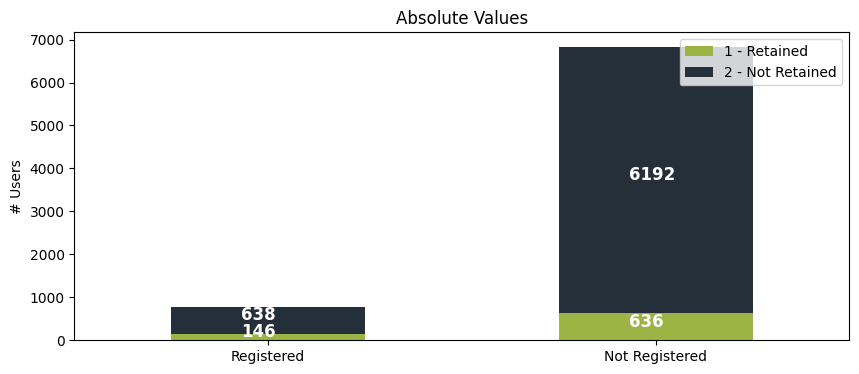

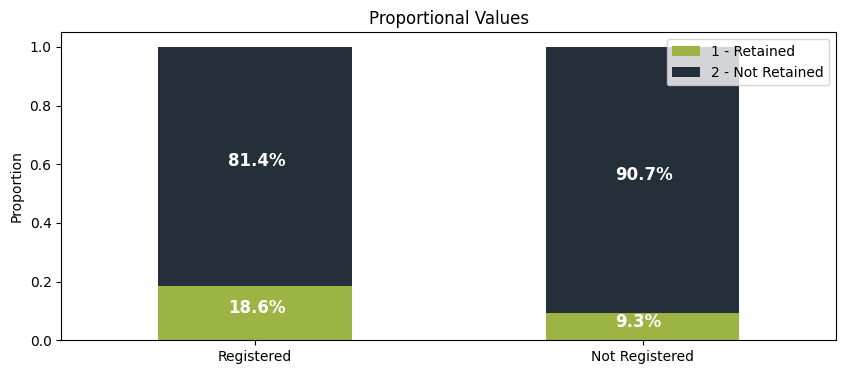

In [ ]:
cross_tab = pd.crosstab(index=df_group['is_registered_user'],
                             columns=df_group['m3_retained'],
                             values=df_group['count'],
                             aggfunc=np.sum)

cross_tab_prop = pd.crosstab(index=df_group['is_registered_user'],
                             columns=df_group['m3_retained'],
                             values=df_group['count'],
                             aggfunc=np.sum,
                             normalize='index')

cross_tab.sort_index(ascending=False, inplace=True)
cross_tab.plot(kind='bar',
                    stacked=True,
                    figsize=(10, 4),
                    color=['#9cb443', '#242f3a'],
                    rot=0)

plt.title('Absolute Values')
plt.legend(loc="upper right")
plt.xlabel("")
plt.ylabel("# Users")

for n, x in enumerate([*cross_tab.index.values]):
    for (value, y_loc) in zip(cross_tab.loc[x],
                                   cross_tab.loc[x].cumsum()):

        plt.text(x=n - 0.07,
                 y=(y_loc - value) + (value / 2),
                 s=f'{value}',
                 color="white",
                 fontsize=12,
                 fontweight="bold")

plt.show()


cross_tab_prop.sort_index(ascending=False, inplace=True)
cross_tab_prop.plot(kind='bar',
                    stacked=True,
                    #colormap='tab10',
                    figsize=(10, 4),
                    color=['#9cb443', '#242f3a'],
                    rot=0)

plt.title('Proportional Values')
plt.legend(loc="upper right")
plt.xlabel("")
plt.ylabel("Proportion")

for n, x in enumerate([*cross_tab.index.values]):
    for (proportion, y_loc) in zip(cross_tab_prop.loc[x],
                                   cross_tab_prop.loc[x].cumsum()):

        plt.text(x=n - 0.07,
                 y=(y_loc - proportion) + (proportion / 2),
                 s=f'{np.round(proportion * 100, 1)}%',
                 color="white",
                 fontsize=12,
                 fontweight="bold")

plt.show()

Considering the non registered users, about 9% of them continue to use the website after 3 months.
However, for the registered users, this number is doubled, since about 18% of them continue to use the website after 3 months!!
It seems that the creation of an account on the website increases the chance for month 3 retention in 100%!! 🤔


---
Continuing the EDA...


In [ ]:
# checking the relationship between 'is_registered_user' and 'user_primary_type':
df_group = df_users.groupby(by=['is_registered_user', 'user_primary_type'], as_index=False).agg({
    'user_id': ['count']
})
df_group.columns = df_group.columns.droplevel(0)
df_group.columns = ['is_registered_user', 'user_primary_type', 'count']
df_group

,is_registered_user,user_primary_type,count
0,False,Unregistered Learner,6828
1,True,Parent,22
2,True,Registered Learner,723
3,True,Teacher,39


- As expected, all users flagged as `is_registered_user = False` are also categorized as "Unregistered Learner" on the column `user_primary_type`.
- For the registered users, there are 3 types: Teacher, Parent or Registered Learner, where the majority of users (92%) are the "Registered Learners", which means the actual students.


Checking the distribution for the other categorical columns:

Column: region

In [ ]:
# checking how many users per region:
df_region = df_users['region'].value_counts(dropna=False)
df_region = df_region.reset_index()

df_region.columns = ['region', 'count']

#df_region.loc[df_region['count'] < 300, 'region'] = 'Other'
#df_region = df_region.groupby('region')['count'].sum() #.sort_values(ascending=False)

df_region.head(7)

,region,count
0,MH,939
1,UP,864
2,KA,599
3,TN,502
4,DL,500
5,TG,409
6,WB,369


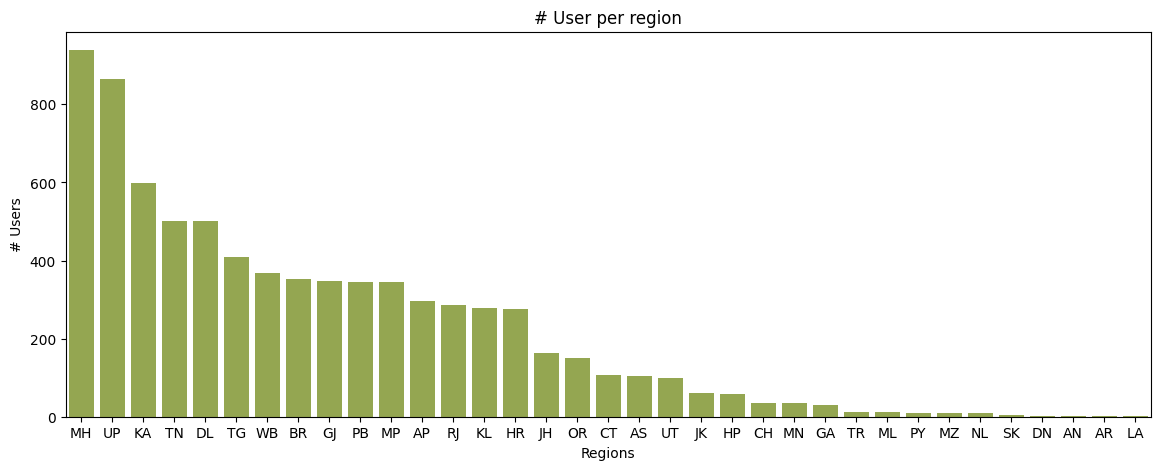

In [ ]:
plt.figure(figsize=(14,5));
sns.barplot(data=df_region, x='region', y='count', color='#9cb443');

plt.title('# User per region')
plt.xlabel("Regions")
plt.ylabel("# Users")

plt.show()

In [ ]:
# calculating the numbers of users for the TOP regions with more users:
num_users_top_regions = df_region.query("region in ('MH', 'UP', 'KA', 'TN', 'DL', 'TG')")['count'].sum()
num_users_total = df_region['count'].sum()

print(num_users_top_regions * 100 / num_users_total)

50.09196006305833


Regions with more users:
- Maharashtra (MH);
- Uttar Pradesh (UP);
- Karnataka (KA);
- Tamil Nadu (TN);
- Delhi (DL);
- Telangana (TG).

The first 6 regions sum up 50% of all the users and the other 30 regions sum up the other 50%.

In [ ]:
# checking the proportion of retained users for each region:
df_group_region = df_users_outcome.groupby(by=['region'], as_index=False).agg({
    'user_id': ['count'],
    'is_registered_user': ['sum', 'mean'],
    'm3_retained': ['sum', 'mean']
})
df_group_region.columns = df_group_region.columns.droplevel(0)
df_group_region.columns = ['region', 'num_users', 'num_registered_users', '%_registered_users', 'num_retained_users', '%_retained_users']
df_group_region.sort_values(by='%_retained_users', ascending=False).head()

,region,num_users,num_registered_users,%_registered_users,num_retained_users,%_retained_users
31,TR,11,3,0.272727,5,0.454545
19,ML,11,2,0.181818,2,0.181818
9,GA,29,2,0.068966,4,0.137931
15,KA,599,70,0.116861,82,0.136895
3,AS,104,7,0.067308,14,0.134615


Column: city

In [ ]:
# checking how many users per city:
df_city = df_users['city'].value_counts(dropna=False)
df_city = df_city.reset_index()
df_city.columns = ['city', 'count']

df_city

,city,count
0,Delhi,455
1,Bangalore,377
2,Mumbai,218
3,Hyderabad,200
4,Pune,162
...,...,...
1113,Sunam,1
1114,Bhaddi,1
1115,Derabassi,1
1116,Arkar,1


There are users from 1,118 different cities, so to better visualize the number, I will aggregate the cities with the least number of users into a category named "Others".

In [ ]:
df_city.loc[df_city['count'] < 50, 'city'] = 'Other'

df_top_cities = df_city.query("city != 'Other'")
df_other_cities = pd.DataFrame({
    'city': ['Other'],
    'count': [df_city.query("city == 'Other'")['count'].sum()]
})
df_city = pd.concat([df_top_cities, df_other_cities], axis=0, ignore_index=True)
df_city

,city,count
0,Delhi,455
1,Bangalore,377
2,Mumbai,218
3,Hyderabad,200
4,Pune,162
5,Thane,145
6,Lucknow,138
7,Calcutta,131
8,Patna,118
9,Botad,105


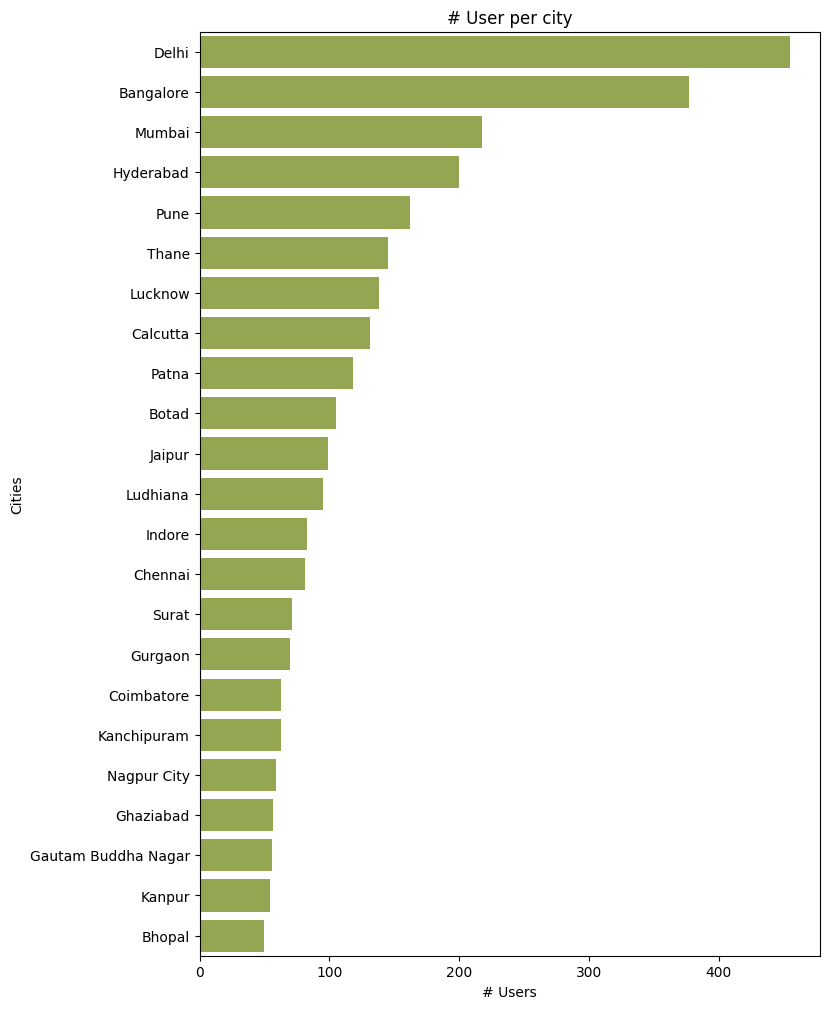

In [ ]:
plt.figure(figsize=(8,12));
sns.barplot(data=df_top_cities, x='count', y='city', orient='h', color='#9cb443');

plt.title('# User per city')
plt.xlabel("# Users")
plt.ylabel("Cities")

plt.show()

In [ ]:
# calculating the numbers of users for the TOP cities with more users:
num_users_top_city = df_city.query("city in ('Delhi', 'Bangalore')")['count'].sum()
num_users_total = df_city['count'].sum()

print(num_users_top_city * 100 / num_users_total)

10.93011035207567


Cities with more users:
- Delhi;
- Bangalore;
- Mumbai;
- Hyderabad;
- Pune;
- Thane.

The first 6 cities sum up 20% of all the users.

In [ ]:
# checking the proportion of retained users for each city:
df_group_city = df_users_outcome.groupby(by=['city'], as_index=False).agg({
    'user_id': ['count'],
    'is_registered_user': ['sum', 'mean'],
    'm3_retained': ['sum', 'mean']
})
df_group_city.columns = df_group_city.columns.droplevel(0)
df_group_city.columns = ['city', 'num_users', 'num_registered_users', '%_registered_users', 'num_retained_users', '%_retained_users']
df_group_city = df_group_city.query("num_users > 10")
df_group_city.sort_values(by='%_retained_users', ascending=False).head(10)

,city,num_users,num_registered_users,%_registered_users,num_retained_users,%_retained_users
678,Kota,13,2,0.153846,4,0.307692
48,Aligarh,19,3,0.157895,5,0.263158
696,Kurnool,16,2,0.125000,4,0.250000
586,Jodhpur,28,5,0.178571,7,0.250000
477,Gautam Buddha Nagar,56,13,0.232143,14,0.250000
260,Bhagawatipara,12,0,0.000000,3,0.250000
823,Nellore,13,3,0.230769,3,0.230769
448,Erode,13,1,0.076923,3,0.230769
452,Faridabad City,42,11,0.261905,8,0.190476
787,Mysore,27,6,0.222222,5,0.185185


Column: attributed_channel

In [ ]:
# checking how many users per channel:
df_channel = df_users['attributed_channel'].value_counts(dropna=False, normalize=True)
df_channel = df_channel.reset_index()
df_channel.columns = ['attributed_channel', 'count']

df_channel

,attributed_channel,count
0,organic search,0.588282
1,direct,0.308198
2,intra_ka,0.056752
3,other KA marketing,0.026800
4,website referral,0.012480
5,social referral,0.003941
6,youtube,0.002627
7,email,0.000920


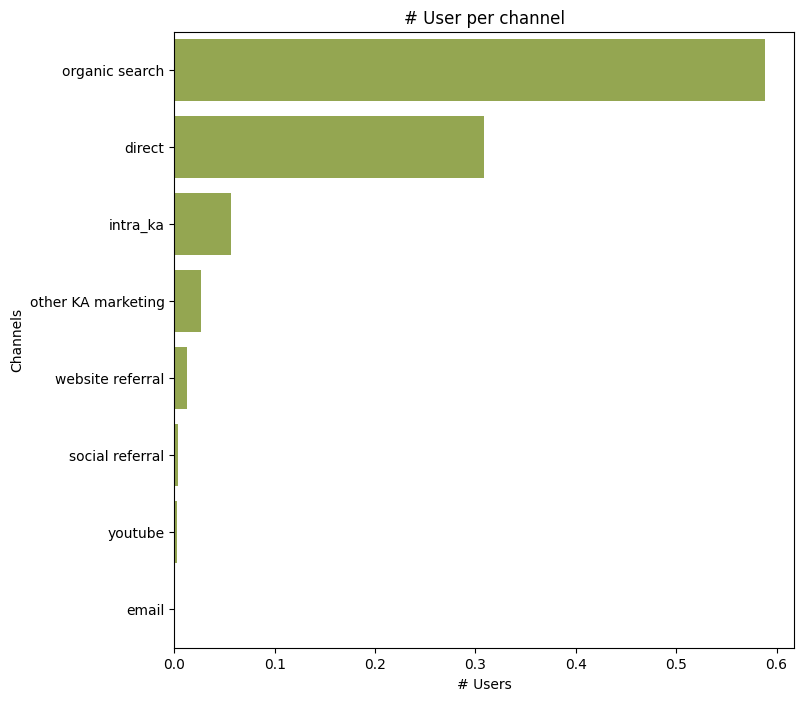

In [ ]:
plt.figure(figsize=(8,8));
sns.barplot(data=df_channel, x='count', y='attributed_channel', orient='h', color='#9cb443');

plt.title('# User per channel')
plt.xlabel("# Users")
plt.ylabel("Channels")

plt.show()

Almost 60% of all users came from an organic search

In [ ]:
df_users.query("attributed_channel == 'organic search' ")['referer_url'].value_counts(dropna=False, normalize=True).head()

https://www.google.com/                                   0.928986
https://www.google.co.in/                                 0.033274
android-app://com.google.android.googlequicksearchbox/    0.010719
http://www.google.com/                                    0.007369
android-app://com.google.android.googlequicksearchbox     0.006699
Name: referer_url, dtype: float64

Almost 93% of the organic search was from Google.

In [ ]:
# checking the proportion of retained users for each channel:
df_users_outcome.groupby(by=['attributed_channel'], as_index=False).agg({
    'user_id': ['count', 'nunique'],
    'is_registered_user': ['sum', 'mean'],
    'm3_retained': ['sum', 'mean']
})

attributed_channel user_id         is_registered_user            \
                        count nunique                sum      mean   
0              direct    2346    2346                376  0.160273   
1               email       7       7                  1  0.142857   
2            intra_ka     432     432                 94  0.217593   
3      organic search    4478    4478                258  0.057615   
4  other KA marketing     204     204                 14  0.068627   
5     social referral      30      30                 11  0.366667   
6    website referral      95      95                 23  0.242105   
7             youtube      20      20                  7  0.350000   

  m3_retained            
          sum      mean  
0         295  0.125746  
1           1  0.142857  
2          39  0.090278  
3         425  0.094908  
4           8  0.039216  
5           1  0.033333  
6          11  0.115789  
7           2  0.100000

#### Analysing the historical usage of the website:

###### **1. What are the general usage patterns and behaviors for these users in their 1st month?**

In [ ]:
# aggregating info for usage and join with the info from the users:
df_usage_stats = df_usage.groupby(by=['user_id'], as_index=False).agg({
    'usage_date': ['count', 'nunique'],
    'start_time_first_ts': ['min', 'max'],
    'total_mins': ['sum', 'mean', 'median']
})
df_usage_stats.columns = df_usage_stats.columns.droplevel(0)
df_usage_stats.columns = ['user_id', 'num_usages', 'num_dates', 'min_date', 'max_date', 'total_mins', 'avg_mins', 'median_mins']
df_usage_stats.head()

,user_id,num_usages,num_dates,min_date,max_date,total_mins,avg_mins,median_mins
0,kaid_1000011729644128754954426,6,1,2021-01-25 05:52:14,2021-01-25 06:50:54,60.623934,10.103989,0.716483
1,kaid_1000177786902274880977611,1,1,2021-01-30 13:24:22,2021-01-30 13:24:22,0.119167,0.119167,0.119167
2,kaid_1000230483580645145638409,1,1,2021-01-07 13:26:59,2021-01-07 13:26:59,0.147867,0.147867,0.147867
3,kaid_1000298010717348530127269,1,1,2021-01-21 06:00:47,2021-01-21 06:00:47,0.700717,0.700717,0.700717
4,kaid_1000478724730003964744679,2,1,2021-01-29 05:45:25,2021-01-29 15:11:21,0.153550,0.076775,0.076775


In [ ]:
# converting 'min_date' and 'max_date' to data type datetime:
df_usage_stats['min_date'] = pd.to_datetime(df_usage_stats['min_date'])
df_usage_stats['max_date'] = pd.to_datetime(df_usage_stats['max_date'])

In [ ]:
df_usage_stats.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5684 entries, 0 to 5683
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   user_id      5684 non-null   object        
 1   num_usages   5684 non-null   int64         
 2   num_dates    5684 non-null   int64         
 3   min_date     5684 non-null   datetime64[ns]
 4   max_date     5684 non-null   datetime64[ns]
 5   total_mins   5684 non-null   float64       
 6   avg_mins     5684 non-null   float64       
 7   median_mins  5684 non-null   float64       
dtypes: datetime64[ns](2), float64(3), int64(2), object(1)
memory usage: 355.4+ KB


In [ ]:
# joining together everything:
df_total = pd.merge(df_users_outcome, df_usage_stats, on='user_id', how='left', indicator=True)
df_total.shape

(7612, 17)

So, the resulting dataframe has one row per user, with stats about the usage of each of them!!

In [ ]:
print(df_total['_merge'].value_counts(dropna=False, normalize=False))
print()
print(df_total['_merge'].value_counts(dropna=False, normalize=True))

both          5684
left_only     1928
right_only       0
Name: _merge, dtype: int64

both          0.746716
left_only     0.253284
right_only    0.000000
Name: _merge, dtype: float64


There are 1,928 users (25%) that have never used the website on the first month, not even once. How is this possible?? 🤔
Hypotesis:
- These users accessed the website on the second month?
- Is there some part of the data missing?

In [ ]:
# creating a flag to indicate if the user have used the website at least one time:
df_total['at_least_one_usage'] = np.where(df_total['_merge'] == 'both', True, False)

In [ ]:
df_total['at_least_one_usage'].value_counts(dropna=False)

True     5684
False    1928
Name: at_least_one_usage, dtype: int64

In [ ]:
# removing column '_merge':
df_total.drop('_merge', axis=1, inplace=True)

In [ ]:
# checking the relationship between 'is_registered_user', 'm3_retained' and 'at_least_one_usage':
df_group = df_total.groupby(by=['m3_retained', 'is_registered_user', 'at_least_one_usage'], as_index=False).agg({
    'user_id': ['count']
})
df_group.columns = df_group.columns.droplevel(0)
df_group.columns = ['m3_retained', 'is_registered_user', 'at_least_one_usage', 'count']

# changing the name of the categories:
df_group['m3_retained'] = np.where(df_group['m3_retained']==1, 'Retained', 'Not Retained')
df_group['at_least_one_usage'] = np.where(df_group['at_least_one_usage'], 'At least one use', 'Never used')

df_group

,m3_retained,is_registered_user,at_least_one_usage,count
0,Not Retained,False,Never used,1461
1,Not Retained,False,At least one use,4731
2,Not Retained,True,Never used,236
3,Not Retained,True,At least one use,402
4,Retained,False,Never used,199
5,Retained,False,At least one use,437
6,Retained,True,Never used,32
7,Retained,True,At least one use,114


There are 32 users that have an account (`is_registered_user = True`), have continued to use the website 3 months after their initial use (`m3_retained = 'Retained'`), but do not have any usage on the first month (`at_least_one_usage = 'Never used'`).
How is this possible?
- Maybe they used on the second and third months?
- Maybe the usage data for these users is missing?

(Not sure yet...)

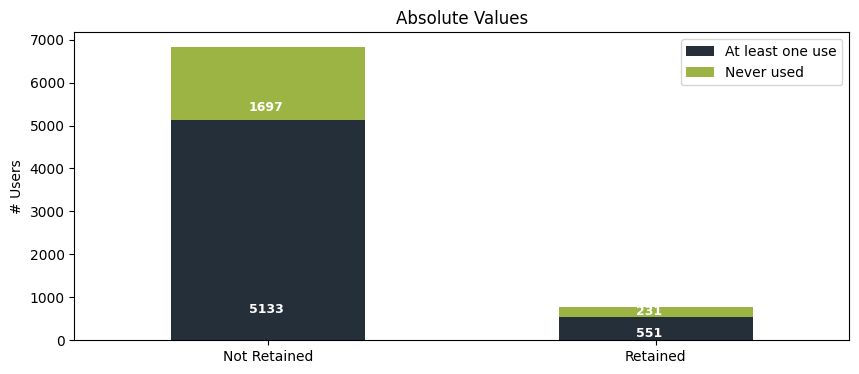

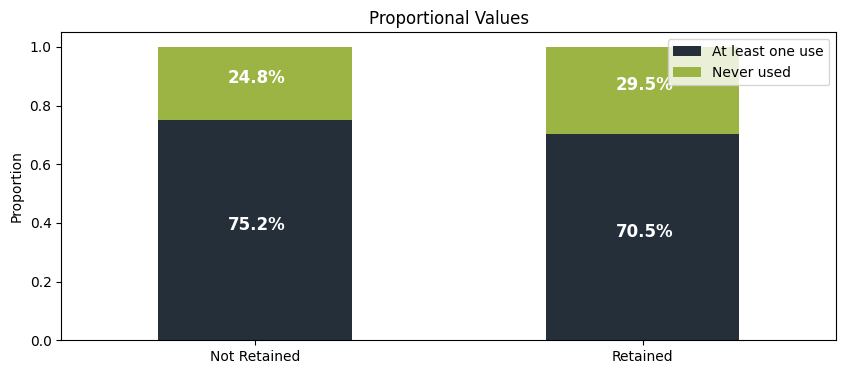

In [ ]:
cross_tab = pd.crosstab(index=df_group['m3_retained'],
                             columns=df_group['at_least_one_usage'],
                             values=df_group['count'],
                             aggfunc=np.sum)

cross_tab_prop = pd.crosstab(index=df_group['m3_retained'],
                             columns=df_group['at_least_one_usage'],
                             values=df_group['count'],
                             aggfunc=np.sum,
                             normalize='index')

#cross_tab.sort_index(ascending=False, inplace=True)
cross_tab.plot(kind='bar',
                    stacked=True,
                    figsize=(10, 4),
                    color=['#242f3a', '#9cb443'],
                    rot=0)

plt.title('Absolute Values')
plt.legend(loc="upper right")
plt.xlabel("")
plt.ylabel("# Users")

for n, x in enumerate([*cross_tab.index.values]):
    for (value, y_loc) in zip(cross_tab.loc[x],
                                   cross_tab.loc[x].cumsum()):

        plt.text(x=n - 0.05,
                 y=(y_loc - value) + (value / 8),
                 s=f'{value}',
                 color="white",
                 fontsize=9,
                 fontweight="bold")

plt.show()


#cross_tab_prop.sort_index(ascending=False, inplace=True)
cross_tab_prop.plot(kind='bar',
                    stacked=True,
                    #colormap='tab10',
                    figsize=(10, 4),
                    color=['#242f3a', '#9cb443'],
                    rot=0)

plt.title('Proportional Values')
plt.legend(loc="upper right")
plt.xlabel("")
plt.ylabel("Proportion")

for n, x in enumerate([*cross_tab.index.values]):
    for (proportion, y_loc) in zip(cross_tab_prop.loc[x],
                                   cross_tab_prop.loc[x].cumsum()):

        plt.text(x=n - 0.07,
                 y=(y_loc - proportion) + (proportion / 2),
                 s=f'{np.round(proportion * 100, 1)}%',
                 color="white",
                 fontsize=12,
                 fontweight="bold")

plt.show()

For the "Retained" users, 70.5% used at least once, but for the "Not Retained" users, 75.2% of them used as least once.
(I do not know what to think of this yet...)

---
Now checking the distribution of the duration of each activity (total_mins)...


In [ ]:
# checking the column 'total_mins':
df_usage['total_mins'].describe()

count    15644.000000
mean         4.469346
std          9.827630
min          0.000017
25%          0.147729
50%          0.954742
75%          4.375750
max        279.019260
Name: total_mins, dtype: float64

- 75% of the users spent at the website at most 4.3 minutes;
- The most time someone spent doing some activity at the website was 279 minutes (4 hours and 39 minutes);
- Half of the users did not spend even 1 whole minute doing some activity at the website.

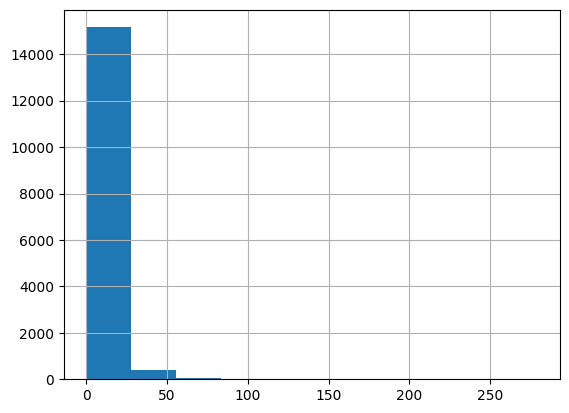

In [ ]:
df_usage['total_mins'].hist();

There are some very big numbers for total_mins. Let me check those cases:

In [ ]:
df_usage.query("total_mins >= 100").sort_values(by=['total_mins'], ascending=False)

,user_id,usage_date,total_mins,activity,content_type,domain_title,course_title,unit_title,locale,client,device_type,os,is_detected_weekday_7am_3pm,start_time_first_ts,end_time_last_ts
11411,kaid_1021076556410846020963073,2021-01-23 00:00:00,279.019260,WATCHING,VIDEO,Economics,Finance and capital markets,Stocks and bonds,en,web,Desktop Web (Non-Chromebook),Windows,False,2021-01-23 06:52:27,2021-01-23 17:15:30
11413,kaid_1021076556410846020963073,2021-01-24 00:00:00,165.981540,WATCHING,VIDEO,Economics,Finance and capital markets,Stocks and bonds,en,web,Desktop Web (Non-Chromebook),Windows,False,2021-01-24 07:19:32,2021-01-24 10:06:36
9867,kaid_929806436432494287865144,2021-01-24 00:00:00,158.131010,READING,ARTICLE,Science,High school biology,Classical genetics,en,web,Phone,Android,False,2021-01-24 01:45:01,2021-01-24 21:21:46
10433,kaid_240675116094868357453104,2021-01-24 00:00:00,136.125820,READING,ARTICLE,Science,AP®︎ Biology,Gene expression and regulation,en,web,Desktop Web (Non-Chromebook),Windows,False,2021-01-24 04:21:13,2021-01-24 13:32:10
1264,kaid_58701633212612215923962,2021-01-12 00:00:00,130.082630,READING,ARTICLE,Math,Precalculus,Matrices,en,web,Desktop Web (Non-Chromebook),Windows,True,2021-01-12 04:21:07,2021-01-12 07:44:32
12140,kaid_309717662377075422600062,2021-01-10 00:00:00,117.140270,WATCHING,VIDEO,Arts and humanities,World history,600 - 1450 Regional and interregional interact...,en,web,Desktop Web (Non-Chromebook),Windows,False,2021-01-10 10:27:15,2021-01-10 15:58:19
12878,kaid_574587254569813604939905,2021-01-11 00:00:00,116.886030,WATCHING,VIDEO,Science,Chemistry,"Buffers, titrations, and solubility equilibria",en,web,Desktop Web (Non-Chromebook),Windows,False,2021-01-11 14:23:04,2021-01-11 17:20:48
12123,kaid_309717662377075422600062,2021-01-09 00:00:00,115.597916,WATCHING,VIDEO,Arts and humanities,World history,600 BCE - 600 CE Second-Wave Civilizations,en,web,Desktop Web (Non-Chromebook),Windows,False,2021-01-09 11:59:21,2021-01-09 17:06:42
2665,kaid_836935299855201775607413,2021-01-31 00:00:00,114.969820,READING,ARTICLE,Math,Multivariable calculus,Applications of multivariable derivatives,en,web,Desktop Web (Non-Chromebook),Windows,False,2021-01-31 03:21:14,2021-01-31 18:30:14
6136,kaid_825971844231075546682232,2021-01-31 00:00:00,112.184670,PRACTICING,EXERCISE,Math,Class 10 Math (India) - Hindi,Probability,en,web,Phone,Android,False,2021-01-31 03:55:48,2021-01-31 21:15:49


Some user used it once to watch more than 4 hours straight on some day. Let me take a look at this user:

In [ ]:
df_users_outcome.query("user_id == 'kaid_1021076556410846020963073' ")

,user_id,first_use_ts,is_registered_user,user_primary_type,region,city,attributed_channel,referer_url,m3_retained
2091,kaid_1021076556410846020963073,2021-01-23 06:39:47,True,Registered Learner,HR,Faridabad City,organic search,https://www.google.com/,1


Nothing strange about this user. Maybe he really watched for more than 4 hours.
Let me check the other activities this user did:

In [ ]:
df_usage.query("user_id == 'kaid_1021076556410846020963073' ").sort_values(by=['usage_date', 'start_time_first_ts'])

,user_id,usage_date,total_mins,activity,content_type,domain_title,course_title,unit_title,locale,client,device_type,os,is_detected_weekday_7am_3pm,start_time_first_ts,end_time_last_ts
11409,kaid_1021076556410846020963073,2021-01-23 00:00:00,0.000833,WATCHING,VIDEO,NaN,NaN,NaN,en,web,Desktop Web (Non-Chromebook),Windows,False,2021-01-23 06:47:25,2021-01-23 06:47:28
11410,kaid_1021076556410846020963073,2021-01-23 00:00:00,4.100000,WATCHING,VIDEO,Economics,Finance and capital markets,Stocks and bonds,en,web,Desktop Web (Non-Chromebook),Windows,False,2021-01-23 06:47:25,2021-01-23 06:52:27
11411,kaid_1021076556410846020963073,2021-01-23 00:00:00,279.019260,WATCHING,VIDEO,Economics,Finance and capital markets,Stocks and bonds,en,web,Desktop Web (Non-Chromebook),Windows,False,2021-01-23 06:52:27,2021-01-23 17:15:30
11408,kaid_1021076556410846020963073,2021-01-23 00:00:00,0.482983,WATCHING,VIDEO,NaN,NaN,NaN,en,web,Desktop Web (Non-Chromebook),Windows,False,2021-01-23 07:07:52,2021-01-23 17:04:26
11412,kaid_1021076556410846020963073,2021-01-24 00:00:00,0.090467,WATCHING,VIDEO,NaN,NaN,NaN,en,web,Desktop Web (Non-Chromebook),Windows,False,2021-01-24 07:19:32,2021-01-24 10:01:34
11413,kaid_1021076556410846020963073,2021-01-24 00:00:00,165.981540,WATCHING,VIDEO,Economics,Finance and capital markets,Stocks and bonds,en,web,Desktop Web (Non-Chromebook),Windows,False,2021-01-24 07:19:32,2021-01-24 10:06:36
11422,kaid_1021076556410846020963073,2021-01-26 00:00:00,0.000067,WATCHING,VIDEO,NaN,NaN,NaN,en,web,Desktop Web (Non-Chromebook),Windows,True,2021-01-26 08:18:49,2021-01-26 08:18:49
11423,kaid_1021076556410846020963073,2021-01-26 00:00:00,0.009317,WATCHING,VIDEO,Economics,Finance and capital markets,Stocks and bonds,en,web,Desktop Web (Non-Chromebook),Windows,True,2021-01-26 08:18:49,2021-01-26 08:18:50
11420,kaid_1021076556410846020963073,2021-01-29 00:00:00,4.955417,WATCHING,VIDEO,Computing,Computer programming,Intro to HTML/CSS: Making webpages,en,web,Desktop Web (Non-Chromebook),Windows,True,2021-01-29 06:18:38,2021-01-29 06:23:35
11417,kaid_1021076556410846020963073,2021-01-29 00:00:00,62.483418,WATCHING,TALKTHROUGH,Computing,Computer programming,Intro to HTML/CSS: Making webpages,en,web,Desktop Web (Non-Chromebook),Windows,True,2021-01-29 06:23:35,2021-01-29 09:07:28


The user seems like a heavy-user!! More than once, this user watched (or did some other activity like programming) for more than an hour!!

Also, what I have noticed is that he started doing some activity as soon as he first entered the website.

I wonder how long the users take to start a activity after the first time use.

I can maybe compare the 'first_use_ts' with the 'min_date' from the df_total dataframe...

In [ ]:
df_total['time_to_first_use'] = (df_total['min_date'] - df_total['first_use_ts'])
df_total['time_to_first_use'] = df_total['time_to_first_use'].apply(lambda x: x.total_seconds()/60)

In [ ]:
df_total.query("user_id == 'kaid_1021076556410846020963073' ")

,user_id,first_use_ts,is_registered_user,user_primary_type,region,city,attributed_channel,referer_url,m3_retained,num_usages,num_dates,min_date,max_date,total_mins,avg_mins,median_mins,at_least_one_usage,time_to_first_use
2091,kaid_1021076556410846020963073,2021-01-23 06:39:47,True,Registered Learner,HR,Faridabad City,organic search,https://www.google.com/,1,23.0,5.0,2021-01-23 06:47:25,2021-01-30 07:13:47,680.376854,29.581602,4.1,True,7.633333


Less than 8 minutes after the first detected use, this user started watching the first videos.

In [ ]:
# checking the distribution of this new feature 'time_to_first_use':
df_total['time_to_first_use'].describe()

count     5684.000000
mean       530.747367
std       3052.147058
min         -0.333333
25%          0.266667
50%          0.483333
75%          1.250000
max      43198.000000
Name: time_to_first_use, dtype: float64

It is not what I expected. 75% of the users started their first activity less than 2 minutes after the first detected use. So maybe this insight I thought I had is not so relevant... :(

Also, there are some negative values? The first activity started BEFORE the first detected use??

In [ ]:
df_total.query("time_to_first_use < 0").shape

(21, 18)

21 users in this scenario...let me see some more:

In [ ]:
df_total['time_to_first_use_sec'] = df_total['time_to_first_use'] * 60

In [ ]:
df_total.query("time_to_first_use < 0")[['user_id', 'first_use_ts', 'min_date', 'max_date', 'time_to_first_use', 'time_to_first_use_sec']]

,user_id,first_use_ts,min_date,max_date,time_to_first_use,time_to_first_use_sec
272,kaid_687031620042874869762559,2021-01-11 14:23:39,2021-01-11 14:23:34,2021-01-11 14:23:34,-0.083333,-5.0
553,kaid_1200845700202511139972215,2021-01-01 15:45:06,2021-01-01 15:44:59,2021-01-01 15:46:00,-0.116667,-7.0
651,kaid_95770252443451966436728,2021-01-25 04:03:49,2021-01-25 04:03:42,2021-01-25 04:03:42,-0.116667,-7.0
1073,kaid_203452683042602173923790,2021-01-14 04:57:18,2021-01-14 04:57:05,2021-01-14 04:57:05,-0.216667,-13.0
2006,kaid_564086643389189047827396,2021-01-07 16:03:25,2021-01-07 16:03:22,2021-01-07 16:03:56,-0.050000,-3.0
2201,kaid_956676229774024645423742,2021-01-18 06:39:07,2021-01-18 06:39:05,2021-01-18 06:39:05,-0.033333,-2.0
2334,kaid_160000258553299503096866,2021-01-08 06:09:39,2021-01-08 06:09:37,2021-01-08 06:09:37,-0.033333,-2.0
2554,kaid_709161430917224890518914,2021-01-15 15:48:40,2021-01-15 15:48:39,2021-01-15 15:49:06,-0.016667,-1.0
2872,kaid_327887111398180571045472,2021-01-31 15:45:38,2021-01-31 15:45:36,2021-01-31 15:45:36,-0.033333,-2.0
3288,kaid_88029125453806304777963,2021-01-08 12:14:26,2021-01-08 12:14:22,2021-01-10 14:53:24,-0.066667,-4.0


It is just a few seconds, so I assume this is some error on the detection for this column 'first_use_ts'.

In [ ]:
df_total.sort_values('time_to_first_use', ascending=False).head()

,user_id,first_use_ts,is_registered_user,user_primary_type,region,city,attributed_channel,referer_url,m3_retained,num_usages,num_dates,min_date,max_date,total_mins,avg_mins,median_mins,at_least_one_usage,time_to_first_use,time_to_first_use_sec
818,kaid_143701371571095810713088,2021-01-01 03:51:22,False,Unregistered Learner,BR,Araria,direct,NaN,0,1.0,1.0,2021-01-31 03:49:22,2021-01-31 03:49:22,0.002017,0.002017,0.002017,True,43198.000000,2591880.0
7018,kaid_1168874019773354293138568,2021-01-05 07:12:56,False,Unregistered Learner,UP,Etah,direct,NaN,0,1.0,1.0,2021-01-31 13:48:52,2021-01-31 13:48:52,0.193183,0.193183,0.193183,True,37835.933333,2270156.0
5362,kaid_406359595195326718237864,2021-01-03 10:48:23,False,Unregistered Learner,RJ,Udaipur,direct,NaN,0,1.0,1.0,2021-01-29 12:44:29,2021-01-29 12:44:29,0.091100,0.091100,0.091100,True,37556.100000,2253366.0
3031,kaid_31731657505387057468723,2021-01-06 02:53:24,False,Unregistered Learner,KL,Kottayam,organic search,https://www.google.com/,0,1.0,1.0,2021-01-31 22:18:24,2021-01-31 22:18:24,0.114817,0.114817,0.114817,True,37165.000000,2229900.0
2611,kaid_1070853674500961462094318,2021-01-04 13:38:22,False,Unregistered Learner,KA,Bagalkot,direct,NaN,0,1.0,1.0,2021-01-29 14:14:50,2021-01-29 14:14:50,3.582550,3.582550,3.582550,True,36036.466667,2162188.0


In [ ]:
# checking more percentiles:
df_total['time_to_first_use'].describe(percentiles=[.25,.5,.75,.8,.85,.9])

count     5684.000000
mean       530.747367
std       3052.147058
min         -0.333333
25%          0.266667
50%          0.483333
75%          1.250000
80%          1.940000
85%          4.283333
90%         29.455000
max      43198.000000
Name: time_to_first_use, dtype: float64

- 90% of the users started some activity on the website less than 30 minutes after the first detected user;
- The other 10% perhaps forgot about it and only started some activity much much time later??

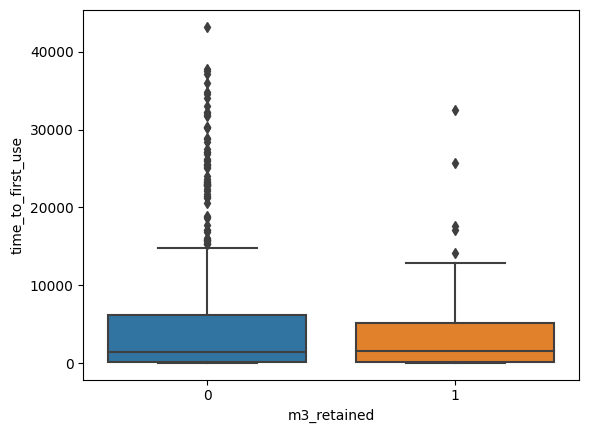

In [ ]:
df_temp = df_total.query("time_to_first_use > 30") #or time_to_first_use.isna()")
#print(df_temp.shape[0]/df_total.shape[0])

#df_temp['log_time_to_first_use'] = np.log(df_temp['time_to_first_use']+1)

sns.boxplot(data=df_temp, x='m3_retained', y='time_to_first_use'); #, hue='is_registered_user');

In [ ]:
df_total['time_category'] = np.where(df_total['time_to_first_use'] < 30, 'Fast start',
                                        np.where(df_total['time_to_first_use'].isna(), 'Never used', 'Slow start'
                                        )
                                     )

df_total.groupby(by='time_category', as_index=False).agg({
    'm3_retained': ['count', 'sum', 'mean']
})

time_category m3_retained               
                      count  sum      mean
0    Fast start        5116  476  0.093041
1    Never used        1928  231  0.119813
2    Slow start         568   75  0.132042

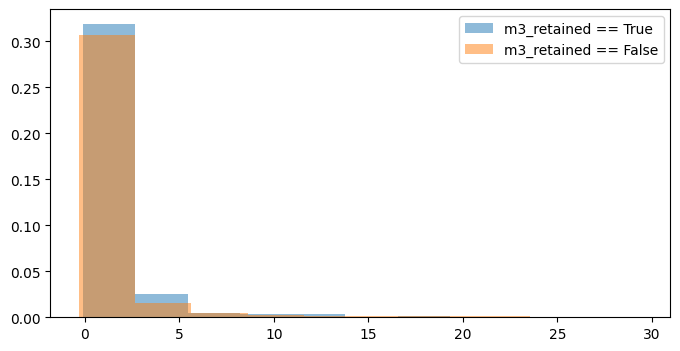

In [ ]:
plt.figure(figsize=(8,4));

df_temp = df_total.query("time_to_first_use < 30")

plt.hist(x=df_temp.query("m3_retained == True")['time_to_first_use'], label='m3_retained == True', alpha=.5, density=True);
plt.hist(x=df_temp.query("m3_retained == False")['time_to_first_use'], label='m3_retained == False', alpha=.5, density=True);

plt.legend();

plt.show()

There seems to be no difference on the retention rate between the users the have started early using the website and the ones that took a while to start using.

##### **2. Are there any behaviors & usage patterns in the 1st month that correlate with month 3 retention? (i.e. choice of learning topic and long term engagement)**


---
Checking the number of usages per user, to see the distribution and also the behaviour between "Retained" and "Not Retained".


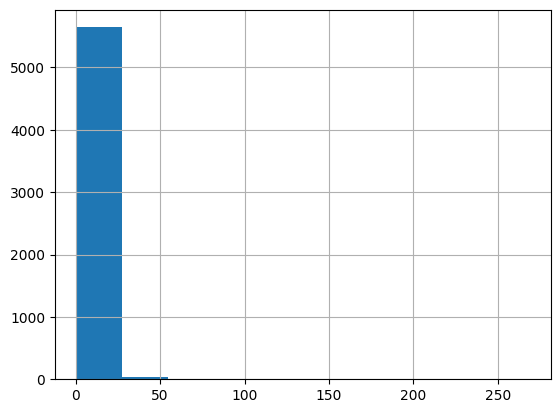

In [ ]:
df_total['num_usages'].hist();

In [ ]:
df_total['num_usages'].describe(percentiles=[.25,.5,.75,.8,.9,.95])

count    5684.000000
mean        2.752287
std         6.549843
min         1.000000
25%         1.000000
50%         2.000000
75%         2.000000
80%         3.000000
90%         5.000000
95%         8.000000
max       268.000000
Name: num_usages, dtype: float64

- 90% of the users accessed the website at most 5 times;
- Someone used 268 times, between different activities;
- Half of the users was not involved in more than 2 different activities at the website.

In [ ]:
# TOP Users by the number of usages:
df_total.query("num_usages >= 8").sort_values(by=['num_usages'], ascending=False).head()

,user_id,first_use_ts,is_registered_user,user_primary_type,region,city,attributed_channel,referer_url,m3_retained,num_usages,num_dates,min_date,max_date,total_mins,avg_mins,median_mins,at_least_one_usage,time_to_first_use,time_to_first_use_sec,time_category
2750,kaid_958006483379771309914809,2021-01-19 14:49:39,True,Registered Learner,KA,Chitradurga,website referral,https://support.grasshopper.app/,1,268.0,13.0,2021-01-19 15:13:15,2021-01-31 16:37:36,1061.563912,3.961059,2.031050,True,23.600000,1416.0,Fast start
3292,kaid_309717662377075422600062,2021-01-05 09:12:51,False,Unregistered Learner,KL,Idukki Painavu,youtube,https://www.youtube.com/,0,171.0,7.0,2021-01-05 09:13:11,2021-01-11 17:39:20,1263.675867,7.389917,0.401833,True,0.333333,20.0,Fast start
1302,kaid_1015772029155921824457648,2021-01-14 06:19:39,False,Unregistered Learner,DL,Bawana,intra_ka,NaN,1,155.0,16.0,2021-01-14 06:20:20,2021-01-31 17:13:35,2322.071515,14.981107,9.378083,True,0.683333,41.0,Fast start
2560,kaid_440615568528306388708593,2021-01-02 16:35:06,True,Registered Learner,KA,Bangalore,intra_ka,NaN,0,125.0,15.0,2021-01-02 16:35:08,2021-01-18 06:28:23,1158.753071,9.270025,2.305267,True,0.033333,2.0,Fast start
4904,kaid_138535849891895290708955,2021-01-09 03:57:50,False,Unregistered Learner,PB,Tarn Taran,other KA marketing,NaN,0,108.0,11.0,2021-01-09 03:58:11,2021-01-30 05:18:27,348.591315,3.227697,0.231350,True,0.350000,21.0,Fast start


Let's take a look at the user that used 268 times!!
- user_id == 'kaid_958006483379771309914809'
- is_registered_user == True
- m3_retained = 1

In [ ]:
df_top_user = df_usage.query("user_id == 'kaid_958006483379771309914809' ").sort_values(by='start_time_first_ts')
df_top_user

,user_id,usage_date,total_mins,activity,content_type,domain_title,course_title,unit_title,locale,client,device_type,os,is_detected_weekday_7am_3pm,start_time_first_ts,end_time_last_ts
9102,kaid_958006483379771309914809,2021-01-19 00:00:00,0.490800,WATCHING,VIDEO,Computing,Computer programming,Intro to JS: Drawing & Animation,en,web,Tablet,Android,False,2021-01-19 15:13:15,2021-01-19 15:14:08
9103,kaid_958006483379771309914809,2021-01-19 00:00:00,8.212433,WATCHING,VIDEO,Computing,Computer programming,Intro to JS: Drawing & Animation,en,web,Tablet,Android,False,2021-01-19 17:13:17,2021-01-19 17:23:42
9104,kaid_958006483379771309914809,2021-01-19 00:00:00,0.215150,READING,ARTICLE,Computing,Computer programming,Intro to JS: Drawing & Animation,en,web,Tablet,Android,False,2021-01-19 17:18:37,2021-01-19 17:18:50
9169,kaid_958006483379771309914809,2021-01-20 00:00:00,0.061483,WATCHING,VIDEO,Computing,Computer programming,Intro to JS: Drawing & Animation,en,web,Tablet,Android,True,2021-01-20 03:33:08,2021-01-20 05:34:16
9155,kaid_958006483379771309914809,2021-01-20 00:00:00,4.727750,WATCHING,VIDEO,Computing,Computer programming,Intro to JS: Drawing & Animation,en,web,Tablet,Android,True,2021-01-20 07:36:43,2021-01-20 08:21:28
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9049,kaid_958006483379771309914809,2021-01-31 00:00:00,14.769317,PROGRAMMING,CHALLENGE,Computing,Computer programming,Intro to JS: Drawing & Animation,en,web,Tablet,Android,False,2021-01-31 06:11:52,2021-01-31 06:40:13
9044,kaid_958006483379771309914809,2021-01-31 00:00:00,10.139116,WATCHING,TALKTHROUGH,Computing,Computer programming,Intro to JS: Drawing & Animation,en,web,Tablet,Android,False,2021-01-31 13:59:46,2021-01-31 14:10:00
9048,kaid_958006483379771309914809,2021-01-31 00:00:00,29.565000,PROGRAMMING,CHALLENGE,Computing,Computer programming,Intro to JS: Drawing & Animation,en,web,Tablet,Android,False,2021-01-31 14:10:02,2021-01-31 14:43:39
9050,kaid_958006483379771309914809,2021-01-31 00:00:00,1.361733,PROGRAMMING,CHALLENGE,Computing,Computer programming,Intro to JS: Drawing & Animation,en,web,Tablet,Android,False,2021-01-31 16:36:18,2021-01-31 16:37:45


In [ ]:
cols = ['locale', 'client', 'device_type', 'os']

for col in cols:
    print(f'Column: {col}')
    print(df_top_user[col].value_counts(dropna=False, normalize=True))
    print('')

Column: locale
en    1.0
Name: locale, dtype: float64

Column: client
web    0.958955
app    0.041045
Name: client, dtype: float64

Column: device_type
Tablet    1.0
Name: device_type, dtype: float64

Column: os
Android    1.0
Name: os, dtype: float64



This user accessed everytime from a Tablet, with an Android os, in English (locale = en), and more than 95% of the time from a web client.

In [ ]:
df_top_user.groupby(by=['course_title', 'unit_title', 'domain_title', 'content_type', 'activity']).agg({
    'usage_date': ['count', 'nunique'],
    'total_mins': ['sum', 'mean', 'median'],
    'is_detected_weekday_7am_3pm': ['sum', 'mean']
})

usage_date  \
                                                                                                               count   
course_title         unit_title                              domain_title        content_type activity                 
Computer programming Intro to JS: Drawing & Animation        Computing           ARTICLE      READING             25   
                                                                                 CHALLENGE    PROGRAMMING         62   
                                                                                 EXERCISE     PRACTICING           4   
                                                                                 PROJECT      PROGRAMMING        102   
                                                                                 TALKTHROUGH  WATCHING            43   
                                                                                 VIDEO        WATCHING            13   
Pixar in a Box       Lesson guides                           Computing           ARTICLE      READING              1   
                                                                                 VIDEO        WATCHING             3   
                     The Art of Storytelling                 Computing           VIDEO        WATCHING             4   
Storytelling         Pixar in a Box: the art of storytelling Arts and humanities ARTICLE      READING              2   
                                                                                 VIDEO        WATCHING             3   

                                                                                                                   \
                                                                                                          nunique   
course_title         unit_title                              domain_title        content_type activity              
Computer programming Intro to JS: Drawing & Animation        Computing           ARTICLE      READING           9   
                                                                                 CHALLENGE    PROGRAMMING      10   
                                                                                 EXERCISE     PRACTICING        3   
                                                                                 PROJECT      PROGRAMMING      10   
                                                                                 TALKTHROUGH  WATCHING         11   
                                                                                 VIDEO        WATCHING          3   
Pixar in a Box       Lesson guides                           Computing           ARTICLE      READING           1   
                                                                                 VIDEO        WATCHING          1   
                     The Art of Storytelling                 Computing           VIDEO        WATCHING          3   
Storytelling         Pixar in a Box: the art of storytelling Arts and humanities ARTICLE      READING           1   
                                                                                 VIDEO        WATCHING          2   

                                                                                                           total_mins  \
                                                                                                                  sum   
course_title         unit_title                              domain_title        content_type activity                  
Computer programming Intro to JS: Drawing & Animation        Computing           ARTICLE      READING       98.019916   
                                                                                 CHALLENGE    PROGRAMMING  246.061417   
                                                                                 EXERCISE     PRACTICING    14.931600   
                                                            

- This user did 3 different courses, 2 of them about Computing;
- Almost 40% of the uses (102 uses out of 268) was some programming activity;
- Most of the time, out of the weekday window from 7am to 3pm;
- Only 15% of the time of the programming activities was done from 7am to 3pm on weekdays;

This user used a lot!! From videos and articles, to challenges and talkthroughs...

---
Now let's take a look on the TOP 2 user, that used 171 times, but is not registered and was not retained after 3 months:
- user_id == 'kaid_309717662377075422600062'
- is_registered_user == False
- m3_retained = 0


In [ ]:
df_top2_user = df_usage.query("user_id == 'kaid_309717662377075422600062' ").sort_values(by='start_time_first_ts')
df_top2_user

,user_id,usage_date,total_mins,activity,content_type,domain_title,course_title,unit_title,locale,client,device_type,os,is_detected_weekday_7am_3pm,start_time_first_ts,end_time_last_ts
12024,kaid_309717662377075422600062,2021-01-05 00:00:00,8.500016,WATCHING,VIDEO,Arts and humanities,US government and civics,Foundations of American democracy,en,web,Desktop Web (Non-Chromebook),Windows,True,2021-01-05 09:13:11,2021-01-05 09:24:55
11997,kaid_309717662377075422600062,2021-01-05 00:00:00,0.000617,WATCHING,VIDEO,NaN,NaN,NaN,en,web,Desktop Web (Non-Chromebook),Windows,True,2021-01-05 09:17:42,2021-01-05 09:21:57
12026,kaid_309717662377075422600062,2021-01-05 00:00:00,27.335716,WATCHING,VIDEO,Arts and humanities,US government and civics,Foundations of American democracy,en,web,Desktop Web (Non-Chromebook),Windows,False,2021-01-05 10:28:43,2021-01-05 11:00:34
11993,kaid_309717662377075422600062,2021-01-05 00:00:00,0.097183,WATCHING,VIDEO,NaN,NaN,NaN,en,web,Desktop Web (Non-Chromebook),Windows,False,2021-01-05 10:29:08,2021-01-05 10:46:55
11990,kaid_309717662377075422600062,2021-01-05 00:00:00,0.001883,READING,ARTICLE,NaN,NaN,NaN,en,web,Desktop Web (Non-Chromebook),Windows,False,2021-01-05 10:38:14,2021-01-05 10:38:14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12131,kaid_309717662377075422600062,2021-01-11 00:00:00,3.338733,WATCHING,VIDEO,Arts and humanities,World history,600 - 1450 Regional and interregional interact...,en,web,Desktop Web (Non-Chromebook),Windows,False,2021-01-11 12:14:14,2021-01-11 12:18:22
12127,kaid_309717662377075422600062,2021-01-11 00:00:00,0.011817,WATCHING,VIDEO,NaN,NaN,NaN,en,web,Desktop Web (Non-Chromebook),Windows,False,2021-01-11 12:14:14,2021-01-11 12:16:35
12130,kaid_309717662377075422600062,2021-01-11 00:00:00,0.761283,WATCHING,VIDEO,Arts and humanities,World history,600 - 1450 Regional and interregional interact...,en,web,Desktop Web (Non-Chromebook),Windows,False,2021-01-11 12:18:24,2021-01-11 12:27:56
12125,kaid_309717662377075422600062,2021-01-11 00:00:00,0.009850,WATCHING,VIDEO,NaN,NaN,NaN,en,web,Desktop Web (Non-Chromebook),Windows,False,2021-01-11 12:20:31,2021-01-11 12:27:56


In [ ]:
cols = ['locale', 'client', 'device_type', 'os']

for col in cols:
    print(f'Column: {col}')
    print(df_top2_user[col].value_counts(dropna=False, normalize=True))
    print('')

Column: locale
en    1.0
Name: locale, dtype: float64

Column: client
web    1.0
Name: client, dtype: float64

Column: device_type
Desktop Web (Non-Chromebook)    1.0
Name: device_type, dtype: float64

Column: os
Windows    1.0
Name: os, dtype: float64



This user accessed everytime from a Windows Desktop device, in English (locale = en), from a web client.

In [ ]:
df_top2_user.groupby(by=['course_title', 'unit_title', 'domain_title', 'content_type', 'activity']).agg({
    'usage_date': ['count', 'nunique'],
    'total_mins': ['sum', 'mean', 'median'],
    'is_detected_weekday_7am_3pm': ['sum', 'mean']
})

usage_date  \
                                                                                                                               count   
course_title                 unit_title                                         domain_title        content_type activity              
Big History Project          1. What Is Big History?                            Arts and humanities VIDEO        WATCHING          2   
                             10. The Future                                     Arts and humanities VIDEO        WATCHING          3   
                             2. The Big Bang                                    Arts and humanities VIDEO        WATCHING          1   
                             3. Stars & Elements                                Arts and humanities VIDEO        WATCHING          4   
                             4. Our Solar System & Earth                        Arts and humanities VIDEO        WATCHING          3   
                             5. Life                                            Arts and humanities VIDEO        WATCHING          1   
                             6. Early Humans                                    Arts and humanities VIDEO        WATCHING          1   
                             7. Agriculture & Civilization                      Arts and humanities ARTICLE      READING           1   
                                                                                                    VIDEO        WATCHING          2   
                             8. Expansion & Interconnection                     Arts and humanities ARTICLE      READING           2   
                                                                                                    VIDEO        WATCHING          2   
                             9. Acceleration                                    Arts and humanities VIDEO        WATCHING          1   
Europe 1300 - 1800           Italy, 14th century                                Arts and humanities ARTICLE      READING           1   
ON World History             Era 1 - Our Big History (13.82 billion years ag... Arts and humanities VIDEO        WATCHING          4   
                             Era 2 - Early Humans (250,000 years BP to 3,000... Arts and humanities VIDEO        WATCHING          2   
                             Era 3 - Cities, Societies, and Empires (6,000 B... Arts and humanities VIDEO        WATCHING          3   
                             Era 4 - Regional Webs (200 to 1500 CE)             Arts and humanities VIDEO        WATCHING          4   
                             Era 5 - The First Global Age  (1200 to 1750 CE)    Arts and humanities VIDEO        WATCHING          3   
                             Era 6 - The Long Nineteenth Century (1750 to 19... Arts and humanities VIDEO        WATCHING          2   
                             Era 7 - The Great Convergence and Divergence (1... Arts and humanities VIDEO        WATCHING          1   
US government and civics     American civics                                    Arts and humanities VIDEO        WATCHING          1   
                             American political beliefs and behaviors           Arts and humanities VIDEO        WATCHING          2   
                             Citizenship                                        Arts and humanities VIDEO        WATCHING          6   
                             Civil liberties and civil rights                   Arts and humanities VIDEO        WATCHING          1   
                             Foundations of American democracy                  Arts and humanities ARTICLE      READING           1   
                                                                                                    VIDEO        WATCHING          3   
                             Government & civics with CBS's John Dickerson      Arts and humanities VIDEO        WATCHING          1   
                             Interactions 

- This user did 6 different courses, all of them about Arts and humanities;
- This user only did 2 different activities: watching videos or reading articles;
- The most time spent on a single activity was 480 minutes watching a video, which was accessed 23 times on 5 different days, so on average, 20 minutes each time;
- **Maybe this lack of focus on fewer courses and/or the absence of practicing activities is an indicator on whether the user is going to be retained or not!!**

---
Now, I am going to try to translate these ideas on some new features for each user, so I can analyse not only one user at a time.


In [ ]:
df_activity_stats = df_usage.groupby(by=['user_id', 'activity'], as_index=False).agg({
    'usage_date': ['count', 'nunique'],
    'total_mins': ['sum', 'mean', 'median']
})
df_activity_stats.columns = df_activity_stats.columns.droplevel(0)
df_activity_stats.columns = ['user_id', 'activity', 'num_usages', 'num_dates', 'total_mins', 'avg_mins', 'median_mins']
df_activity_stats.head()

,user_id,activity,num_usages,num_dates,total_mins,avg_mins,median_mins
0,kaid_1000011729644128754954426,PRACTICING,2,1,32.517883,16.258942,16.258942
1,kaid_1000011729644128754954426,READING,2,1,1.012333,0.506167,0.506167
2,kaid_1000011729644128754954426,WATCHING,2,1,27.093717,13.546859,13.546859
3,kaid_1000177786902274880977611,WATCHING,1,1,0.119167,0.119167,0.119167
4,kaid_1000230483580645145638409,WATCHING,1,1,0.147867,0.147867,0.147867


In [ ]:
# checking the two users I chose as examples:
df_activity_stats.query("user_id in ('kaid_958006483379771309914809', 'kaid_309717662377075422600062')")

,user_id,activity,num_usages,num_dates,total_mins,avg_mins,median_mins
2616,kaid_309717662377075422600062,READING,17,5,8.642800,0.508400,0.025383
2617,kaid_309717662377075422600062,WATCHING,154,7,1255.033067,8.149565,0.661700
7152,kaid_958006483379771309914809,PRACTICING,4,3,14.931600,3.732900,4.024433
7153,kaid_958006483379771309914809,PROGRAMMING,170,12,692.242264,4.072013,1.967600
7154,kaid_958006483379771309914809,READING,28,10,101.027683,3.608132,1.667758
7155,kaid_958006483379771309914809,WATCHING,66,12,253.362365,3.838824,2.668692


In [ ]:
df_activity = pd.pivot_table(data=df_activity_stats, index='user_id', columns='activity', values=['avg_mins', 'num_usages', 'total_mins'], fill_value=0)
df_activity.reset_index(inplace=True)

df_activity.columns = [
    'user_id',
    'avg_mins_other_learning', 'avg_mins_practicing', 'avg_mins_programming', 'avg_mins_reading', 'avg_mins_watching',
    'num_usages_other_learning', 'num_usages_practicing', 'num_usages_programming', 'num_usages_reading', 'num_usages_watching',
    'total_mins_other_learning', 'total_mins_practicing', 'total_mins_programming', 'total_mins_reading', 'total_mins_watching'
]
df_activity.head()

,user_id,avg_mins_other_learning,avg_mins_practicing,avg_mins_programming,avg_mins_reading,avg_mins_watching,num_usages_other_learning,num_usages_practicing,num_usages_programming,num_usages_reading,num_usages_watching,total_mins_other_learning,total_mins_practicing,total_mins_programming,total_mins_reading,total_mins_watching
0,kaid_1000011729644128754954426,0.0,16.258942,0.0,0.506167,13.546859,0,2,0,2,2,0.0,32.517883,0.0,1.012333,27.093717
1,kaid_1000177786902274880977611,0.0,0.000000,0.0,0.000000,0.119167,0,0,0,0,1,0.0,0.000000,0.0,0.000000,0.119167
2,kaid_1000230483580645145638409,0.0,0.000000,0.0,0.000000,0.147867,0,0,0,0,1,0.0,0.000000,0.0,0.000000,0.147867
3,kaid_1000298010717348530127269,0.0,0.000000,0.0,0.000000,0.700717,0,0,0,0,1,0.0,0.000000,0.0,0.000000,0.700717
4,kaid_1000478724730003964744679,0.0,0.000000,0.0,0.076775,0.000000,0,0,0,2,0,0.0,0.000000,0.0,0.153550,0.000000


In [ ]:
df_merge = pd.merge(df_total, df_activity, on='user_id', how='left')
df_merge.head()

,user_id,first_use_ts,is_registered_user,user_primary_type,region,city,attributed_channel,referer_url,m3_retained,num_usages,...,num_usages_other_learning,num_usages_practicing,num_usages_programming,num_usages_reading,num_usages_watching,total_mins_other_learning,total_mins_practicing,total_mins_programming,total_mins_reading,total_mins_watching
0,kaid_1172977777831184091024959,2021-01-18 03:10:00,False,Unregistered Learner,GA,Navelim,organic search,https://www.google.com/,0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.000000,0.0,10.047566,0.000000
1,kaid_1167642368311104946092969,2021-01-04 06:13:35,False,Unregistered Learner,GA,Alto-Porvorim,intra_ka,https://www.khanacademy.org/math/in-in-class-1...,0,8.0,...,0.0,0.0,0.0,2.0,6.0,0.0,0.000000,0.0,0.463567,20.297300
2,kaid_167569696178549414384138,2021-01-24 17:22:43,False,Unregistered Learner,MZ,Aizawl,other KA marketing,NaN,0,2.0,...,0.0,1.0,0.0,0.0,1.0,0.0,4.475083,0.0,0.000000,0.000633
3,kaid_1030430879261145466031150,2021-01-15 05:42:56,False,Unregistered Learner,NL,Kohima,organic search,https://www.google.com/,0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,kaid_826231243401218994536338,2021-01-21 10:28:37,False,Unregistered Learner,CH,Chandigarh,other KA marketing,NaN,0,2.0,...,0.0,2.0,0.0,0.0,0.0,0.0,3.699050,0.0,0.000000,0.000000


In [ ]:
# checking the two users I chose as examples:
df_merge.query("user_id in ('kaid_958006483379771309914809', 'kaid_309717662377075422600062')")

,user_id,first_use_ts,is_registered_user,user_primary_type,region,city,attributed_channel,referer_url,m3_retained,num_usages,...,num_usages_other_learning,num_usages_practicing,num_usages_programming,num_usages_reading,num_usages_watching,total_mins_other_learning,total_mins_practicing,total_mins_programming,total_mins_reading,total_mins_watching
2750,kaid_958006483379771309914809,2021-01-19 14:49:39,True,Registered Learner,KA,Chitradurga,website referral,https://support.grasshopper.app/,1,268.0,...,0.0,4.0,170.0,28.0,66.0,0.0,14.9316,692.242264,101.027683,253.362365
3292,kaid_309717662377075422600062,2021-01-05 09:12:51,False,Unregistered Learner,KL,Idukki Painavu,youtube,https://www.youtube.com/,0,171.0,...,0.0,0.0,0.0,17.0,154.0,0.0,0.0000,0.000000,8.642800,1255.033067


In [ ]:
cols = [
    #'avg_mins_other_learning', 'avg_mins_practicing', 'avg_mins_programming', 'avg_mins_reading', 'avg_mins_watching',
    'num_usages_other_learning', 'num_usages_practicing', 'num_usages_programming', 'num_usages_reading', 'num_usages_watching',
    'total_mins_other_learning', 'total_mins_practicing', 'total_mins_programming', 'total_mins_reading', 'total_mins_watching'
]
df_merge[cols].describe(percentiles=[.25,.5,.75,.8,.9,.95])

,num_usages_other_learning,num_usages_practicing,num_usages_programming,num_usages_reading,num_usages_watching,total_mins_other_learning,total_mins_practicing,total_mins_programming,total_mins_reading,total_mins_watching
count,5684.000000,5684.00000,5684.000000,5684.000000,5684.000000,5684.000000,5684.000000,5684.000000,5684.000000,5684.000000
mean,0.002463,0.75563,0.059289,0.666608,1.268297,0.008561,3.498983,0.529613,2.605870,5.657897
std,0.064939,3.01622,2.428894,1.378119,3.113147,0.362497,22.327270,19.774255,10.938098,28.116015
min,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.00000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.320633
75%,0.000000,0.00000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.956546,3.285762
80%,0.000000,1.00000,0.000000,1.000000,2.000000,0.000000,0.291907,0.000000,1.699220,4.802133
90%,0.000000,2.00000,0.000000,2.000000,2.000000,0.000000,4.434142,0.000000,5.757653,10.832600
95%,0.000000,4.00000,0.000000,2.000000,4.000000,0.000000,13.584490,0.000000,11.996949,22.622245


- 90% of the users did at most 2 practicing activities;
- 90% of the users did less than 5 minutes of practicing activities;


(Maybe the users who did at least 2 practicing activities are more willing to be retained...I will take a look at this idea...)

In [ ]:
df_merge['practical_user'] = np.where(df_merge['num_usages_practicing'] > 4, 'Practical user', 'Theoretical user')
df_merge['practical_user'].value_counts(dropna=False, normalize=True)

Theoretical user    0.975171
Practical user      0.024829
Name: practical_user, dtype: float64

In [ ]:
df_merge.groupby(by='practical_user', as_index=False).agg({
    'm3_retained': ['count', 'sum', 'mean']
})

practical_user m3_retained               
                          count  sum      mean
0    Practical user         189   39  0.206349
1  Theoretical user        7423  743  0.100094

Woww!! Between the "theoretical users", 10% of them were retained. But between the "practical users", 20% of them were retained!!
That is incredible!! It seems that somehow practical activities has some influence on the retention!! 🤔

In [ ]:
# calculating the proportion of practicing usages compared to the total:
df_merge['prop_practicing'] = np.round(df_merge['num_usages_practicing'] *100/ df_merge['num_usages'], 2)

df_merge['prop_practicing'].describe(percentiles=[.25,.5,.75,.8,.9,.95])

count    5684.000000
mean       15.567891
std        30.790968
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
80%        33.330000
90%        66.670000
95%       100.000000
max       100.000000
Name: prop_practicing, dtype: float64

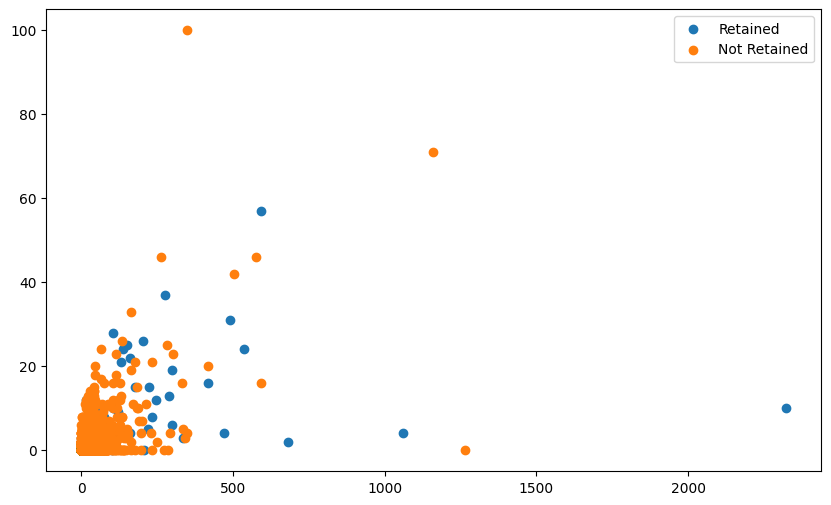

In [ ]:
# checking the behaviour of usages and retention:
plt.figure(figsize=(10,6))

plt.scatter(data=df_merge.query("m3_retained == 1"), x='total_mins', y='num_usages_practicing', label='Retained');
plt.scatter(data=df_merge.query("m3_retained == 0"), x='total_mins', y='num_usages_practicing', label='Not Retained');

plt.legend()
plt.show()

In [ ]:
# calculating how many courses each user did:
df_course_stats = df_usage.groupby(by=['user_id'], as_index=False).agg({
    'course_title': ['count', 'nunique']
})
df_course_stats.columns = df_course_stats.columns.droplevel(0)
df_course_stats.columns = ['user_id', 'num_courses', 'distinct_courses']
df_course_stats.head()

,user_id,num_courses,distinct_courses
0,kaid_1000011729644128754954426,3,1
1,kaid_1000177786902274880977611,1,1
2,kaid_1000230483580645145638409,1,1
3,kaid_1000298010717348530127269,1,1
4,kaid_1000478724730003964744679,2,1


In [ ]:
df_merge = pd.merge(df_merge, df_course_stats, on='user_id', how='left')
df_merge.head()

,user_id,first_use_ts,is_registered_user,user_primary_type,region,city,attributed_channel,referer_url,m3_retained,num_usages,...,num_usages_watching,total_mins_other_learning,total_mins_practicing,total_mins_programming,total_mins_reading,total_mins_watching,practical_user,prop_practicing,num_courses,distinct_courses
0,kaid_1172977777831184091024959,2021-01-18 03:10:00,False,Unregistered Learner,GA,Navelim,organic search,https://www.google.com/,0,1.0,...,0.0,0.0,0.000000,0.0,10.047566,0.000000,Theoretical user,0.0,1.0,1.0
1,kaid_1167642368311104946092969,2021-01-04 06:13:35,False,Unregistered Learner,GA,Alto-Porvorim,intra_ka,https://www.khanacademy.org/math/in-in-class-1...,0,8.0,...,6.0,0.0,0.000000,0.0,0.463567,20.297300,Theoretical user,0.0,5.0,3.0
2,kaid_167569696178549414384138,2021-01-24 17:22:43,False,Unregistered Learner,MZ,Aizawl,other KA marketing,NaN,0,2.0,...,1.0,0.0,4.475083,0.0,0.000000,0.000633,Theoretical user,50.0,2.0,1.0
3,kaid_1030430879261145466031150,2021-01-15 05:42:56,False,Unregistered Learner,NL,Kohima,organic search,https://www.google.com/,0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,Theoretical user,NaN,NaN,NaN
4,kaid_826231243401218994536338,2021-01-21 10:28:37,False,Unregistered Learner,CH,Chandigarh,other KA marketing,NaN,0,2.0,...,0.0,0.0,3.699050,0.0,0.000000,0.000000,Theoretical user,100.0,1.0,1.0


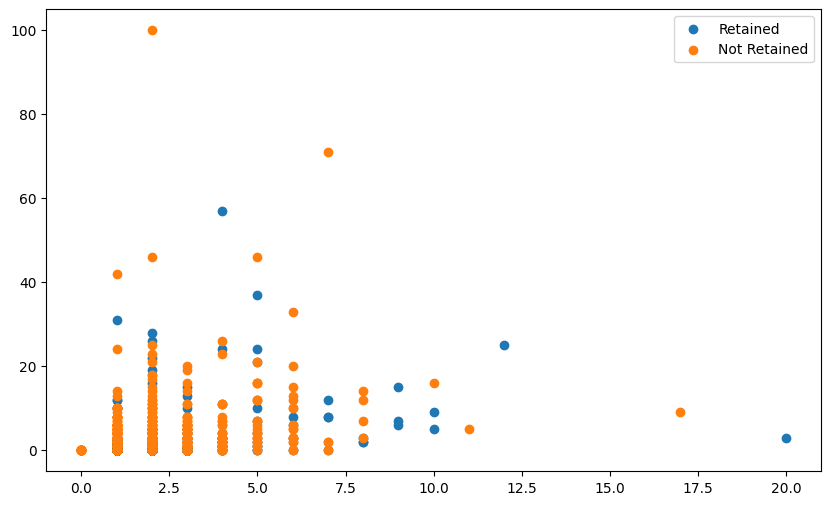

In [ ]:
plt.figure(figsize=(10,6))

plt.scatter(data=df_merge.query("m3_retained == 1"), x='distinct_courses', y='num_usages_practicing', label='Retained');
plt.scatter(data=df_merge.query("m3_retained == 0"), x='distinct_courses', y='num_usages_practicing', label='Not Retained');

plt.legend()
plt.show()

My hypotesis was that the more practicing activites, more likely to be retained! And also, at a certain number of courses done at the same time, the likelihood of retention would change.
But I could not find any of it, at least not with this visualizations so far...

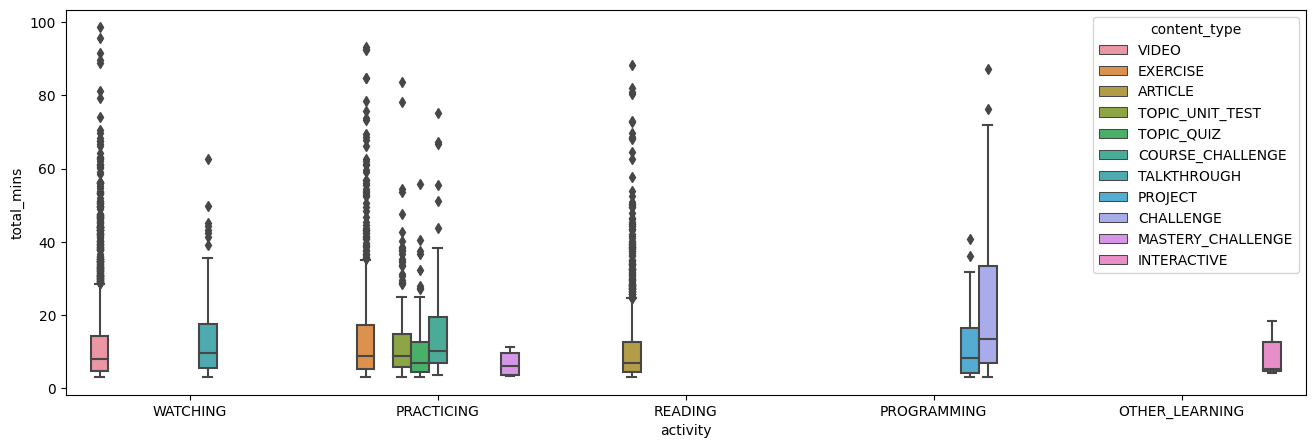

In [ ]:
# making some other visualizations, combining content_type and activity:
plt.figure(figsize=(16, 5))
sns.boxplot(data=df_usage.query("total_mins > 3 and total_mins < 100"), x='activity', y='total_mins', hue='content_type');
plt.show()

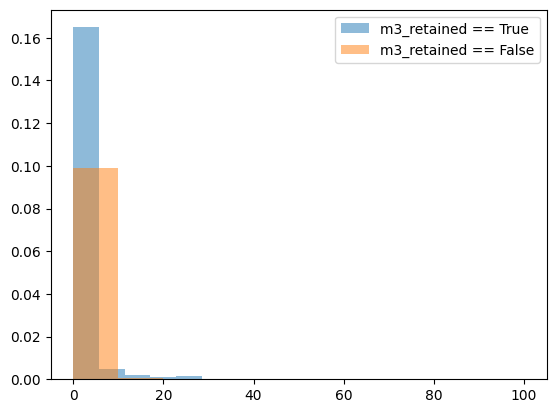

In [ ]:
# trying to see the difference of behaviour between retained and not retained users:
plt.hist(x=df_merge.query("m3_retained == True")['num_usages_practicing'], label='m3_retained == True', alpha=.5, density=True);
plt.hist(x=df_merge.query("m3_retained == False")['num_usages_practicing'], label='m3_retained == False', alpha=.5, density=True);

plt.legend();

plt.show()

Difficult to see, because the distributions are very skewed!!

In [ ]:
# calculating statistics for the column 'content_type':
df_content_type_stats = df_usage.groupby(by=['user_id', 'content_type'], as_index=False).agg({
    'usage_date': ['count', 'nunique'],
    'total_mins': ['sum', 'mean', 'median']
})
df_content_type_stats.columns = df_content_type_stats.columns.droplevel(0)
df_content_type_stats.columns = ['user_id', 'content_type', 'num_usages', 'num_dates', 'total_mins', 'avg_mins', 'median_mins']
df_content_type_stats.head()

,user_id,content_type,num_usages,num_dates,total_mins,avg_mins,median_mins
0,kaid_1000011729644128754954426,ARTICLE,2,1,1.012333,0.506167,0.506167
1,kaid_1000011729644128754954426,EXERCISE,2,1,32.517883,16.258942,16.258942
2,kaid_1000011729644128754954426,VIDEO,2,1,27.093717,13.546859,13.546859
3,kaid_1000177786902274880977611,VIDEO,1,1,0.119167,0.119167,0.119167
4,kaid_1000230483580645145638409,VIDEO,1,1,0.147867,0.147867,0.147867


In [ ]:
df_content_type_stats['content_type'].value_counts(dropna=False, normalize=True)

VIDEO                0.459881
ARTICLE              0.296616
EXERCISE             0.145773
TOPIC_UNIT_TEST      0.036126
TOPIC_QUIZ           0.026873
COURSE_CHALLENGE     0.016225
TALKTHROUGH          0.007352
CHALLENGE            0.006211
PROJECT              0.002028
MASTERY_CHALLENGE    0.001648
INTERACTIVE          0.001268
Name: content_type, dtype: float64

In [ ]:
# combining some categories to make it easier the next analysis:
df_content_type_stats['content_type'] = np.where(df_content_type_stats['content_type'].str.contains('VIDEO') |
                                                 df_content_type_stats['content_type'].str.contains('ARTICLE') |
                                                 df_content_type_stats['content_type'].str.contains('EXERCISE'),
                                                    df_content_type_stats['content_type'], 'OTHER')

In [ ]:
df_content = pd.pivot_table(data=df_content_type_stats, index='user_id', columns='content_type', values=['avg_mins', 'num_usages', 'total_mins'], fill_value=0)
df_content.reset_index(inplace=True)

df_content.columns = [
    'user_id',
    'avg_mins_article', 'avg_mins_exercise', 'avg_mins_other', 'avg_mins_video',
    'num_usages_article', 'num_usages_exercise', 'num_usages_other', 'num_usages_video',
    'total_mins_article', 'total_mins_exercise', 'total_mins_other', 'total_mins_video'
]
df_content.head()

,user_id,avg_mins_article,avg_mins_exercise,avg_mins_other,avg_mins_video,num_usages_article,num_usages_exercise,num_usages_other,num_usages_video,total_mins_article,total_mins_exercise,total_mins_other,total_mins_video
0,kaid_1000011729644128754954426,0.506167,16.258942,0.0,13.546859,2,2,0.0,2,1.012333,32.517883,0.0,27.093717
1,kaid_1000177786902274880977611,0.000000,0.000000,0.0,0.119167,0,0,0.0,1,0.000000,0.000000,0.0,0.119167
2,kaid_1000230483580645145638409,0.000000,0.000000,0.0,0.147867,0,0,0.0,1,0.000000,0.000000,0.0,0.147867
3,kaid_1000298010717348530127269,0.000000,0.000000,0.0,0.700717,0,0,0.0,1,0.000000,0.000000,0.0,0.700717
4,kaid_1000478724730003964744679,0.076775,0.000000,0.0,0.000000,2,0,0.0,0,0.153550,0.000000,0.0,0.000000


In [ ]:
df_merge = pd.merge(df_merge, df_content, on='user_id', how='left')
df_merge.head()

,user_id,first_use_ts,is_registered_user,user_primary_type,region,city,attributed_channel,referer_url,m3_retained,num_usages,...,avg_mins_other,avg_mins_video,num_usages_article,num_usages_exercise,num_usages_other,num_usages_video,total_mins_article,total_mins_exercise,total_mins_other,total_mins_video
0,kaid_1172977777831184091024959,2021-01-18 03:10:00,False,Unregistered Learner,GA,Navelim,organic search,https://www.google.com/,0,1.0,...,0.000000,0.000000,1.0,0.0,0.0,0.0,10.047566,0.0,0.000000,0.000000
1,kaid_1167642368311104946092969,2021-01-04 06:13:35,False,Unregistered Learner,GA,Alto-Porvorim,intra_ka,https://www.khanacademy.org/math/in-in-class-1...,0,8.0,...,0.000000,3.382883,2.0,0.0,0.0,6.0,0.463567,0.0,0.000000,20.297300
2,kaid_167569696178549414384138,2021-01-24 17:22:43,False,Unregistered Learner,MZ,Aizawl,other KA marketing,NaN,0,2.0,...,4.475083,0.000633,0.0,0.0,1.0,1.0,0.000000,0.0,4.475083,0.000633
3,kaid_1030430879261145466031150,2021-01-15 05:42:56,False,Unregistered Learner,NL,Kohima,organic search,https://www.google.com/,0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,kaid_826231243401218994536338,2021-01-21 10:28:37,False,Unregistered Learner,CH,Chandigarh,other KA marketing,NaN,0,2.0,...,1.849525,0.000000,0.0,0.0,2.0,0.0,0.000000,0.0,3.699050,0.000000


<ipython-input-117-ead49e259037>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp[f'log_{col}'] = np.log(df_temp[col]+1)


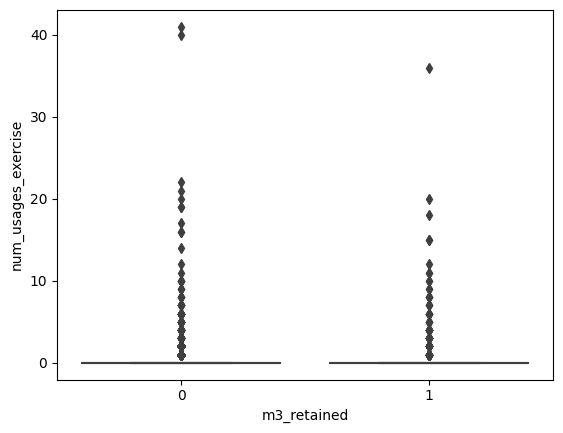

In [ ]:
col = 'num_usages_exercise'
df_temp = df_merge.query("num_usages_exercise >= 0")
df_temp[f'log_{col}'] = np.log(df_temp[col]+1)

sns.boxplot(data=df_temp, x='m3_retained', y=f'{col}'); #, hue='is_registered_user');

In [ ]:
df_merge['num_usages_exercise'].describe(percentiles=[.25,.5,.75,.8,.9,.95])

count    5679.000000
mean        0.455186
std         1.635957
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
80%         1.000000
90%         1.000000
95%         2.000000
max        41.000000
Name: num_usages_exercise, dtype: float64

- 90% of the users did less than one activity of type "exercise"!! Similar to what was found for activity "practicing";
- 70% of the users did ZERO exercises!!
- That is way the boxplot is so terrible to visualize!!

In [ ]:
df_merge['exercise_user'] = np.where(df_merge['num_usages_exercise'] > 2, 'Exercise user', 'No exercise user')
df_merge['exercise_user'].value_counts(dropna=False, normalize=True)

No exercise user    0.970704
Exercise user       0.029296
Name: exercise_user, dtype: float64

In [ ]:
df_merge.groupby(by='exercise_user', as_index=False).agg({
    'm3_retained': ['count', 'sum', 'mean']
})

exercise_user m3_retained               
                          count  sum      mean
0     Exercise user         223   52  0.233184
1  No exercise user        7389  730  0.098796

Woww²!! Between the "not exercise users", almost 10% of them were retained. But between the "exercise users", 23% of them were retained!!
That is incredible x 2!! This seems to reinforce the idea that somehow practical activities (such as exercises) has some influence on the retention!! 🤔

In [ ]:
# checking now the column 'domain_title':
df_usage['domain_title'].value_counts(dropna=False, normalize=True)

Math                          0.397341
Science                       0.233636
NaN                           0.148491
Computing                     0.086423
Arts and humanities           0.060534
Economics                     0.034134
Test prep                     0.032025
College, careers, and more    0.005625
Khan for Educators            0.001598
ELA                           0.000128
Math Content                  0.000064
Name: domain_title, dtype: float64

- Almost 40% of the uses are on Math courses!!
- Followed by Science, with 23%!!
- Almost 15% of the uses do not have theirs "domain_title" labeled, so it is filled with NaN.

In [ ]:
# calculating statistics for the different domain titles:
df_domain_title_stats = df_usage.groupby(by=['user_id', 'domain_title'], as_index=False).agg({
    'usage_date': ['count', 'nunique'],
    'total_mins': ['sum', 'mean', 'median']
})
df_domain_title_stats.columns = df_domain_title_stats.columns.droplevel(0)
df_domain_title_stats.columns = ['user_id', 'domain_title', 'num_usages', 'num_dates', 'total_mins', 'avg_mins', 'median_mins']
df_domain_title_stats.head()

,user_id,domain_title,num_usages,num_dates,total_mins,avg_mins,median_mins
0,kaid_1000011729644128754954426,Science,3,1,60.193200,20.064400,27.085117
1,kaid_1000177786902274880977611,Math,1,1,0.119167,0.119167,0.119167
2,kaid_1000230483580645145638409,Math,1,1,0.147867,0.147867,0.147867
3,kaid_1000298010717348530127269,Science,1,1,0.700717,0.700717,0.700717
4,kaid_1000478724730003964744679,Science,2,1,0.153550,0.076775,0.076775


In [ ]:
# combining some categories to make it easier the next analysis:
df_domain_title_stats['domain_title'] = np.where(df_domain_title_stats['domain_title'].str.endswith('Math') |
                                                 df_domain_title_stats['domain_title'].str.contains('Science') |
                                                 df_domain_title_stats['domain_title'].str.contains('Computing') |
                                                 df_domain_title_stats['domain_title'].str.contains('Arts and humanities'),
                                                    df_domain_title_stats['domain_title'], 'OTHER')

In [ ]:
df_domain_title = pd.pivot_table(data=df_domain_title_stats, index='user_id', columns='domain_title', values=['avg_mins', 'num_usages', 'total_mins'], fill_value=0)
df_domain_title.reset_index(inplace=True)

df_domain_title.columns = [
    'user_id',
    'avg_mins_arts', 'avg_mins_computing', 'avg_mins_math', 'avg_mins_other_domain',  'avg_mins_science',
    'num_usages_arts', 'num_usages_computing', 'num_usages_math', 'num_usages_other_domain', 'num_usages_science',
    'total_mins_arts', 'total_mins_computing', 'total_mins_math', 'total_mins_other_domain', 'total_mins_science'
]
df_domain_title.head()

,user_id,avg_mins_arts,avg_mins_computing,avg_mins_math,avg_mins_other_domain,avg_mins_science,num_usages_arts,num_usages_computing,num_usages_math,num_usages_other_domain,num_usages_science,total_mins_arts,total_mins_computing,total_mins_math,total_mins_other_domain,total_mins_science
0,kaid_1000011729644128754954426,0.0,0.0,0.000000,0.0,20.064400,0,0,0,0.0,3,0.0,0.0,0.000000,0.0,60.193200
1,kaid_1000177786902274880977611,0.0,0.0,0.119167,0.0,0.000000,0,0,1,0.0,0,0.0,0.0,0.119167,0.0,0.000000
2,kaid_1000230483580645145638409,0.0,0.0,0.147867,0.0,0.000000,0,0,1,0.0,0,0.0,0.0,0.147867,0.0,0.000000
3,kaid_1000298010717348530127269,0.0,0.0,0.000000,0.0,0.700717,0,0,0,0.0,1,0.0,0.0,0.000000,0.0,0.700717
4,kaid_1000478724730003964744679,0.0,0.0,0.000000,0.0,0.076775,0,0,0,0.0,2,0.0,0.0,0.000000,0.0,0.153550


In [ ]:
df_merge = pd.merge(df_merge, df_domain_title, on='user_id', how='left')
df_merge.head()

,user_id,first_use_ts,is_registered_user,user_primary_type,region,city,attributed_channel,referer_url,m3_retained,num_usages,...,num_usages_arts,num_usages_computing,num_usages_math,num_usages_other_domain,num_usages_science,total_mins_arts,total_mins_computing,total_mins_math,total_mins_other_domain,total_mins_science
0,kaid_1172977777831184091024959,2021-01-18 03:10:00,False,Unregistered Learner,GA,Navelim,organic search,https://www.google.com/,0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.000000,0.0,0.000000,0.0,10.047566
1,kaid_1167642368311104946092969,2021-01-04 06:13:35,False,Unregistered Learner,GA,Alto-Porvorim,intra_ka,https://www.khanacademy.org/math/in-in-class-1...,0,8.0,...,4.0,0.0,1.0,0.0,0.0,18.796667,0.0,1.958600,0.0,0.000000
2,kaid_167569696178549414384138,2021-01-24 17:22:43,False,Unregistered Learner,MZ,Aizawl,other KA marketing,NaN,0,2.0,...,0.0,0.0,2.0,0.0,0.0,0.000000,0.0,4.475717,0.0,0.000000
3,kaid_1030430879261145466031150,2021-01-15 05:42:56,False,Unregistered Learner,NL,Kohima,organic search,https://www.google.com/,0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,kaid_826231243401218994536338,2021-01-21 10:28:37,False,Unregistered Learner,CH,Chandigarh,other KA marketing,NaN,0,2.0,...,0.0,0.0,1.0,0.0,0.0,0.000000,0.0,3.695467,0.0,0.000000


With now 67 columns on the dataframe df_merge and considering that each row is a user, it is possible to make a lot of studies of the behaviour of the users on all these different dimensions: activity, content type, domain title, etc.

<ipython-input-126-3365787c7960>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp[f'log_{col}'] = np.log(df_temp[col]+1)


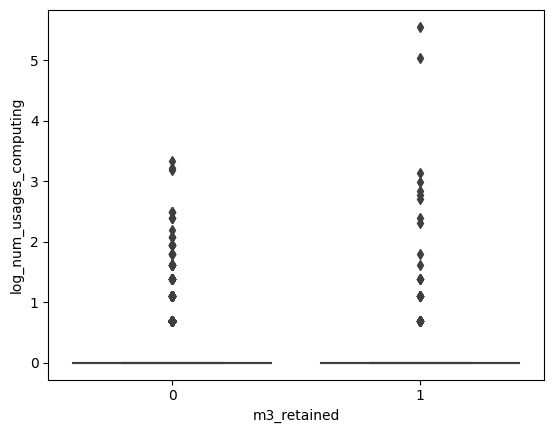

In [ ]:
# trying to visualize the behaviour of different domain titles and the retention:
col = 'num_usages_computing'
df_temp = df_merge.query("num_usages_computing >= 0")
df_temp[f'log_{col}'] = np.log(df_temp[col]+1)

sns.boxplot(data=df_temp, x='m3_retained', y=f'log_{col}'); #, hue='is_registered_user');

Again, very difficult to visualize the boxplot, even with the log transformation!!

In [ ]:
cols = [
    'num_usages_arts', 'num_usages_computing', 'num_usages_math', 'num_usages_other_domain', 'num_usages_science',
    'total_mins_arts', 'total_mins_computing', 'total_mins_math', 'total_mins_other_domain', 'total_mins_science'
]
df_merge[cols].describe(percentiles=[.25,.5,.75,.8,.9,.95])

,num_usages_arts,num_usages_computing,num_usages_math,num_usages_other_domain,num_usages_science,total_mins_arts,total_mins_computing,total_mins_math,total_mins_other_domain,total_mins_science
count,5655.000000,5655.000000,5655.000000,5655.000000,5655.000000,5655.000000,5655.000000,5655.000000,5655.000000,5655.000000
mean,0.167462,0.239080,1.099204,0.196994,0.646331,0.795076,1.359293,5.472566,1.154010,3.428161
std,1.987777,4.095231,2.690869,0.736283,1.855243,18.658369,34.715196,28.131318,10.676637,19.021672
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,2.174250,0.000000,0.638850
80%,0.000000,0.000000,2.000000,0.000000,1.000000,0.000000,0.000000,3.623560,0.000000,1.498463
90%,0.000000,0.000000,2.000000,1.000000,2.000000,0.000000,0.000000,9.669646,0.318707,6.376880
95%,1.000000,1.000000,4.000000,1.000000,3.000000,0.791927,0.726850,21.554101,3.188022,14.038498


- 90% of the users did less than 2 math related uses!!
- 90% used less than 10 minutes on math content!!
- Half of them did ZERO math related uses!!

In [ ]:
df_merge['math_user'] = np.where(df_merge['num_usages_math'] > 3, 'Math user', 'No math user')
df_merge['math_user'].value_counts(dropna=False, normalize=True)

No math user    0.95691
Math user       0.04309
Name: math_user, dtype: float64

In [ ]:
df_merge.groupby(by='math_user', as_index=False).agg({
    'm3_retained': ['count', 'sum', 'mean']
})

math_user m3_retained               
                      count  sum      mean
0     Math user         328   61  0.185976
1  No math user        7284  721  0.098984

Woww³!! Between the "not math users", almost 10% of them were retained. But between the "math users", 18% of them were retained!!
That is MATHEMAGICAL!!
Maybe the domain of the courses the users do has some influence on the retention too!! 🤔

##### **3. What recommendations would you make around how we should think about improving month 3 retention? If you had access to more information, what other data points might you want to have to answer this question?**

My recommendations, based on the analysis I made so far:
- Trying to encourage, somehow, users to create an account (register on the website), because this factor seems to influence on the 3 month retention. Maybe tell the user he/she will gain some prize or something like that if he/she creates the account and then this could potentially increase the retention;
- Encourage the users to make more practicing activities, like exercices, challenges and so on, again, because this seems to impact the 3 month retention;
- Make the Math content more visible, more accessible and irresistible, because it seems that users who uses Math content has some impact on the 3 month retention as well.

If I had access to more information, I would want:
- Data about other users, not just from India;
- Data from a larger period, not just one month;
- Demographic information about the users, for example, age and occupation, because maybe users from different ages have different behaviours and use more or less online courses. Also, if the knowledge about if the user is studying or working can help predict the free time each user has available and so, the likelihood of continuing to use the website after 3 months.

---
---

**I could go on with a lot more analysis, check all other columns, make more visualizations and compare the behaviour for the retained and not retained users, but because of the limited time to do this assignment, I stopped here!! On the "Possible next steps" section below, I list more ideas I would do if I had more time!!**

### 4 - Conclusions:

- All users are from India and started using the website on January of 2021;
- Almost 90% of the users are not registered on the website, which is a lot!! **(Why users do not create accounts??)**
- Almost 90% of the users did not continue to use 3 months after the initial use; **(Retention rate of only 10%!! Why is that??)**
- Even though the registered users are only 10% of the total, they are 2 times more likely to be retained for the third month than the not registered users;
- Almost 60% of all users came from an organic search, mostly coming from Google search engine;
- Some dimensions of the usages on the first month seems to influence the retention rate after 3 months such as: practicing activities, exercises contents, Math contents, etc;
- With just these initial analysis, it was already possible to have some insights and gain some valuable information about the behaviour of the users. With more time, it is possible to have a lot more insights and new ideas on how to increase the 3 month retention!!


### 5 - Possible next steps:

There are a lot of things that are possible and interesting to do with these datasets (and also improvements concerning the organization of the code itself), such as:

- Create functions to reuse some pieces of code, such as the plotting of some charts, the part that creates the grouped tables and the pivot tables, the part to iterate through each numerical column to see the histogram, boxplot and other plots;
- Analyse more carefully each column, first as an univariate analysis and then as bivariate analysis (for both numerical and categorical columns);
- Check for correlations between the numerical columns (each pair of variables) and check the proportion of users for each categorical columns more carefully (with bar plots, for example);
- Draw map plots from India and color each region (or city) based on the numerical variables (for example, the number os users on each region), so that it could be possible to visualize these distributions geographically and maybe find some patterns that was not able to spot without these maps (for example, use geopandas and shapely to develop and execute this);
- Create more features based on the behaviour of the users, such as the ones I created: "practical user", "math user" and so on;
- With the ABT (Abalytical Base Table) that I created (dataframe df_merge with more than 60 variables), try out different kinds of supervised learning classification models, using "m3_retained" as target, to see if some of these variables are good predictors of the month 3 retention (Examples of possible classification models: logistic regression, decision tree, random forest, XGBoost and other tree-based models, neural networks and so many more!);
- After trying some models, selecting one and training the chosen model, an idea is to deploy the model on some format (maybe web, maybe as an API), so that it can be used by the engagement team (assuming that there is one) to help them categorize each new user based on the use on the first month and then, if the user has a high probability to abandon the use after 3 months, the necessary teams could do some action to try to retain this user with, for example e-mails with new courses to attract the user's attention, push notification on the user's cell phone, banners on the home page of Khan Academy website and so on.